<a href="https://colab.research.google.com/github/adeliamara/job-analysis/blob/main/job_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta dos dados

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

sheet_id = "105CGy_r6cNHpZveR5_dH4q54ItGw-sL1Y--DU9IXp2I"
sheet_names = ['linkedin', 'indeed', 'gupy']

dataframes = {}

for sheet_name in sheet_names:
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    df = pd.read_csv(url)

    dataframes[sheet_name] = df

    df.to_csv(f"{sheet_name}.csv", index=False)
    print(f"Planilha '{sheet_name}' salva como '{sheet_name}.csv'")

linkedin_df = dataframes['linkedin']
indeed_df = dataframes['indeed']
gupy_df = dataframes['gupy']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Planilha 'linkedin' salva como 'linkedin.csv'
Planilha 'indeed' salva como 'indeed.csv'
Planilha 'gupy' salva como 'gupy.csv'


## Defininindo search term (gupy)

In [ ]:
total_df = pd.concat([linkedin_df, indeed_df, gupy_df], ignore_index=True)

total_collected = len(total_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 4101


### Contando por termo de busca

In [ ]:
def categorize_title(title):
    if isinstance(title, float):
        title = str(title)
        print(title)
    title = title.lower()

    if 'software' in title:
        return 'software'
    elif 'desenvolvedor' in title or 'dev' in title:
        return 'desenvolvedor'
    else:
        return 'programador'

def fill_termo_busca(row):
    if not pd.isna(row['function']) and row['function'] != '' and row['function'] != 'Unknown' and row['function'] != 'dev':
        return row['function']
    else:
        return categorize_title(row['title'])

gupy_df['termo_busca'] = gupy_df.apply(fill_termo_busca, axis=1)


In [ ]:
def count_vacancies_per_term(df, column_name='termo_busca'):
    """
    Counts the number of job vacancies for each search term in a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column containing the search terms.

    Returns:
        A pandas Series with the search terms as index and the counts as values.
    """
    return df[column_name].dropna().value_counts()

indeed_vacancy_counts = count_vacancies_per_term(indeed_df)
linkedin_vacancy_counts = count_vacancies_per_term(linkedin_df)
gupy_vacancy_counts = count_vacancies_per_term(gupy_df)

print("Indeed Vacancy Counts:")
print(indeed_vacancy_counts)

print("\nLinkedIn Vacancy Counts:")
print(linkedin_vacancy_counts)

print("\nGupyVacancy Counts:")
print(gupy_vacancy_counts)


Indeed Vacancy Counts:
termo_busca
desenvolvedor    757
programador      464
software         239
Name: count, dtype: int64

LinkedIn Vacancy Counts:
termo_busca
desenvolvedor    792
programador      654
software         434
dev               33
Name: count, dtype: int64

GupyVacancy Counts:
termo_busca
desenvolvedor    533
programador      118
software          77
Name: count, dtype: int64


# Limpeza

## Removendo duplicadas


In [ ]:
duplicates = linkedin_df.duplicated(subset=['title', 'companyName', 'publishedAt'], keep='first')

duplicates.sum()

583

In [ ]:
linkedin_df = linkedin_df.drop_duplicates(subset=['title', 'companyName', 'publishedAt'], keep='first')



In [ ]:
indeed_df.duplicated(subset=['postingDateParsed', 'company', 'positionName'], keep='first').sum()

176

In [ ]:
indeed_df = indeed_df.drop_duplicates(subset=['postingDateParsed', 'company', 'positionName'], keep='first')
indeed_df

,company,description,descriptionHTML,externalApplyLink,id,isExpired,jobType/0,jobType/1,location,positionName,...,reviewsCount,salary,scrapedAt,searchInput/country,searchInput/position,jobUrl,urlInput,fonte,termo_busca,jobType/2
0,Divulga Vagas - Consultoria OFICIAL,Atribuições: Quais serão as suas principais re...,<div>Atribui&ccedil;&otilde;es: Quais ser&atil...,https://br.indeed.com/applystart?jk=6bf1696b32...,6bf1696b32a1a023,False,NaN,NaN,"Água Branca, AL",DESENVOLVEDOR FULLSTACK SÊNIOR – ALAGOAS – AL,...,0,NaN,2024-12-18T04:12:28.773Z,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=6bf1696b32a1a023,NaN,indeed,desenvolvedor,NaN
1,COMPANHIA NACIONAL DE ÁLCOOL (CNA ALM.TAMANDARÉ),"Responder pelas atividades de logística, acomp...",<div><p>Responder pelas atividades de log&iacu...,https://br.indeed.com/applystart?jk=697b8a9538...,697b8a9538cc4c21,False,NaN,NaN,"Almirante Tamandaré, PR",Supervisor de Logística,...,0,NaN,2024-12-18T04:47:48.044Z,BR,programador,https://br.indeed.com/viewjob?jk=697b8a9538cc4c21,NaN,indeed,programador,NaN
2,Divulga Vagas - Consultoria OFICIAL,Atribuições:\n-Preparar e operar máquina CNC- ...,<div>Atribui&ccedil;&otilde;es:<br>\n-Preparar...,https://br.indeed.com/applystart?jk=4dd53ea862...,4dd53ea8628bf1b8,False,NaN,NaN,"Alvorada, RS",PREPARADOR PROGRAMADOR DE MÁQUINAS – ALVORADA ...,...,0,R$ 2.200 por mês,2024-12-18T04:11:58.218Z,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=4dd53ea8628bf1b8,NaN,indeed,desenvolvedor,NaN
3,Netvagas,Descrição:\n\nEstamos à procura de um profissi...,<div>Descri&ccedil;&atilde;o:\n<p>Estamos &agr...,https://br.indeed.com/applystart?jk=b435cee0cc...,b435cee0ccbdd548,False,Autônomo / PJ,NaN,"Americana, SP",Programador php sênior,...,57,NaN,2024-12-18T04:13:23.832Z,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=b435cee0ccbdd548,NaN,indeed,desenvolvedor,NaN
4,echope,A vaga de Gerente de Loja é uma posição de lid...,A vaga de Gerente de Loja é uma posição de lid...,https://br.indeed.com/applystart?jk=08d7130c90...,08d7130c909be632,False,NaN,NaN,"Anápolis, GO",Gerente de Loja,...,3,NaN,2024-12-18T04:25:32.372Z,BR,dev,https://br.indeed.com/viewjob?jk=08d7130c909be632,NaN,indeed,software,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,Timenow,Na busca contínua por mentes criativas e apaix...,<div><p>Na busca cont&iacute;nua por mentes cr...,https://br.indeed.com/applystart?jk=f9d30b4fb4...,f9d30b4fb405555e,False,NaN,NaN,"Vitória, ES",Pessoa Analista de Pessoal,...,0,NaN,2024-12-18T04:23:04.460Z,BR,dev,https://br.indeed.com/viewjob?jk=f9d30b4fb405555e,NaN,indeed,software,NaN
1455,Rede Gazeta,Quer fazer parte do maior grupo de Comunicação...,<div><p>Quer fazer parte do maior grupo de Com...,https://br.indeed.com/applystart?jk=1cbee95b0b...,1cbee95b0b941ae2,False,NaN,NaN,"Vitória, ES",CONTROLADOR DE PROGRAMAÇÃO,...,27,NaN,2024-12-18T04:43:46.273Z,BR,programador,https://br.indeed.com/viewjob?jk=1cbee95b0b941ae2,NaN,indeed,programador,NaN
1456,Netvagas,Descrição: Estamos a procura de profissional p...,<b>Descrição:</b> Estamos a procura de profiss...,https://br.indeed.com/applystart?jk=fe18f28556...,fe18f285566fde0b,False,NaN,NaN,"Volta Redonda, RJ",Atendente de adega (112),...,57,NaN,2024-12-18T04:25:49.837Z,BR,dev,https://br.indeed.com/viewjob?jk=fe18f285566fde0b,NaN,indeed,software,NaN
1457,Medsystem Equipamentos Médicos Eireli,Descrição\n* Executar serviços programados (Ca...,<p>Descri&ccedil;&atilde;o</p><ul><li>Executar...,NaN,af597efb68a552fc,False,Efetivo CLT,Tempo integral,"Zona Leste de São Paulo, SP",Técnico em Engenharia Clínica,...,0,NaN,2024-12-18T04:45:24.859Z,BR,programador,https://br.indeed.com/viewjob?jk=af597efb68a552fc,NaN,indeed,programador,NaN


In [ ]:
gupy_df.duplicated(subset=['title', 'company_id'], keep='first').sum()

468

In [ ]:
gupy_df = gupy_df.sort_values(by=['type'], ascending=False, na_position='last')

gupy_df = gupy_df.drop_duplicates(subset=['title', 'company_id'], keep='first')

### Contando por termo de busca

In [ ]:
def count_vacancies_per_term(df, column_name='termo_busca'):
    """
    Counts the number of job vacancies for each search term in a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column containing the search terms.

    Returns:
        A pandas Series with the search terms as index and the counts as values.
    """
    return df[column_name].dropna().value_counts()

indeed_vacancy_counts = count_vacancies_per_term(indeed_df)
linkedin_vacancy_counts = count_vacancies_per_term(linkedin_df)
gupy_vacancy_counts = count_vacancies_per_term(gupy_df)

print("Indeed Vacancy Counts:")
print(indeed_vacancy_counts)

print("\nLinkedIn Vacancy Counts:")
print(linkedin_vacancy_counts)

print("\nGupyVacancy Counts:")
print(gupy_vacancy_counts)


Indeed Vacancy Counts:
termo_busca
desenvolvedor    757
programador      298
software         229
Name: count, dtype: int64

LinkedIn Vacancy Counts:
termo_busca
programador      509
desenvolvedor    503
software         292
dev               26
Name: count, dtype: int64

GupyVacancy Counts:
termo_busca
desenvolvedor    130
programador       99
software          31
Name: count, dtype: int64


In [ ]:
total_df = pd.concat([linkedin_df, indeed_df, gupy_df], ignore_index=True)

total_collected = len(total_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 2874


## Unificando DFS e Padronizando os titulos

In [ ]:
import uuid
import pandas as pd

rename_mapping = {
    'companyId': 'company_id',
    'company': 'company_name',
    'companyName': 'company_name',
    'company_name': 'company_name',
    'location': 'location',
    'Location': 'location',
    'positionName': 'title',
    'title': 'title',
    'experience_level': 'is_remote',
    'workType': 'work_type',
    'requirements': 'description',
    'published_date': 'published_date',
    'publishedAt': 'published_date',
    'postingDateParsed': 'published_date',
    'postingDate': 'published_date',
    'termo_busca': 'search_term',
    'scrapedAt': 'created_at',
    'jobUrl': 'job_url',
    'externalApplyLink': 'external_job_url',
    'url': 'external_job_url',
    'applyUrl': 'external_job_url',
    'jobType/0': 'contract_type',
    'contractType': 'contract_type',
    'type': 'contract_type',
    'fonte':  'origin_site_name'
}

linkedin_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(linkedin_df))]
gupy_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(gupy_df))]
indeed_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(indeed_df))]

df1 = linkedin_df.rename(columns=rename_mapping)
df2 = gupy_df.rename(columns=rename_mapping)
df3 = indeed_df.rename(columns=rename_mapping)

all_columns = set(df1.columns).union(set(df2.columns), set(df3.columns))

df1 = df1.reindex(columns=all_columns)
df2 = df2.reindex(columns=all_columns)
df3 = df3.reindex(columns=all_columns)

concatenated_df = pd.concat([df1, df2, df3], ignore_index=True)



<ipython-input-158-d533903b436c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(linkedin_df))]
<ipython-input-158-d533903b436c>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indeed_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(indeed_df))]


In [ ]:
concatenated_df.columns

Index(['benefits', 'experienceLevel', 'job_url', 'companyUrl',
       'origin_site_name', 'company_id', 'external_job_url', 'reviewsCount',
       'id', 'location', 'is_remote', 'descriptionHTML', 'jobType/2',
       'company_name', 'posterProfileUrl', 'search_term', 'postedTime',
       'postedAt', 'function', 'contract_type', 'urlInput', 'applyType',
       'work_type', 'created_at', 'jobType/1', 'job_id', 'description',
       'rating', 'title', 'isExpired', 'searchInput/position',
       'searchInput/country', 'published_date', 'sector', 'posterFullName',
       'usinagem', 'salary'],
      dtype='object')

## Sanitizando dados




### titulo diferente


In [ ]:
import pandas as pd

# Função para filtrar títulos relacionados a tech
def is_tech_related(title):
    if pd.isna(title):
        return False
    title = str(title).lower()
    tech_keywords = ['Dados', 'Desenvolvimento', 'Computação', 'Informática', 'Backend', 'Frontend', 'Back end', 'Back-end', 'Front End', 'Front-end', 'Analista de Desenvolvimento', 'software', 'desenvolvedor', 'dev', 'developer', 'engineer', 'programador', 'data' , 'cloud', 'tech']
    return any(keyword.lower() in title.lower() for keyword in tech_keywords)

non_tech_related_df = concatenated_df[~concatenated_df['title'].apply(is_tech_related)]

# Filtrar DataFrame para títulos relacionados a tech
concatenated_df = concatenated_df[concatenated_df['title'].apply(is_tech_related)]

# Exibir os títulos que foram removidos (não relacionados a tech)

# Exibir os dados removidos
print("Títulos não relacionados a Tech:")
print(non_tech_related_df[['title']])

non_tech_related_df.to_csv('non_tech_related_data.csv', index=False)


Títulos não relacionados a Tech:
                              title
0      ANALISTA DE PPCP E MATERIAIS
1         Orientador(a) Educacional
2              Estágio (Financeiro)
3       Operador centro de usinagem
4                    TLM Apprentice
...                             ...
2867          Medidor em vidraçaria
2869     Pessoa Analista de Pessoal
2870     CONTROLADOR DE PROGRAMAÇÃO
2871       Atendente de adega (112)
2872  Técnico em Engenharia Clínica

[873 rows x 1 columns]


In [ ]:
concatenated_df['title']

,title
6,PL/SR Desenvolvimento Back-end (Node.js e Type...
7,Analista de desenvolvimento de produtos
8,Analista de Desenvolvimento Jr.
9,Analista Programador Pleno III
10,Application Developer
...,...
2847,Arquiteto(a) de Software Especialista
2854,Técnico de Instalação e Programador
2863,ANALISTA PROGRAMADOR – VITÓRIA DA CONQUISTA – BA
2868,Dev Fullstack .Net + Angular 2+ (Híbrido - Vit...


### Removendo linhas com descrição nula

In [ ]:
concatenated_df = concatenated_df.dropna(subset=['description'])  # Remove rows where 'description' is NaN

concatenated_df = concatenated_df[concatenated_df['description'] != '']

concatenated_df


,benefits,experienceLevel,job_url,companyUrl,origin_site_name,company_id,external_job_url,reviewsCount,id,location,...,rating,title,isExpired,searchInput/position,searchInput/country,published_date,sector,posterFullName,usinagem,salary
6,NaN,Not Applicable,https://br.linkedin.com/jobs/view/pl-sr-desenv...,https://br.linkedin.com/company/ilia-digital?t...,linkedin,73466489.0,https://boards.greenhouse.io/ilia/jobs/5399604004,NaN,4100031409,Brazil,...,NaN,PL/SR Desenvolvimento Back-end (Node.js e Type...,NaN,NaN,NaN,2024-12-13,IT Services and IT Consulting,NaN,109 applicants,NaN
7,NaN,Associate,https://br.linkedin.com/jobs/view/analista-de-...,https://br.linkedin.com/company/iavdobrasil?tr...,linkedin,11530771.0,https://br.linkedin.com/jobs/view/analista-de-...,NaN,4098327662,"São Paulo, Brazil",...,NaN,Analista de desenvolvimento de produtos,NaN,NaN,NaN,2024-12-13,Software Development,Débora Lopez,103 applicants,NaN
8,NaN,Associate,https://br.linkedin.com/jobs/view/analista-de-...,https://br.linkedin.com/company/kantaribopemed...,linkedin,14524.0,https://br.linkedin.com/jobs/view/analista-de-...,NaN,4099938937,"São Paulo, São Paulo, Brazil",...,NaN,Analista de Desenvolvimento Jr.,NaN,NaN,NaN,2024-12-13,Research Services,NaN,Over 200 applicants,NaN
9,NaN,Not Applicable,https://br.linkedin.com/jobs/view/analista-pro...,https://br.linkedin.com/company/webcartorios?t...,linkedin,82648809.0,https://br.linkedin.com/jobs/view/analista-pro...,NaN,3378334364,"São José dos Campos, São Paulo, Brazil",...,NaN,Analista Programador Pleno III,NaN,NaN,NaN,2024-12-13,NaN,Maria Clara Barboza,28 applicants,NaN
10,NaN,Entry level,https://br.linkedin.com/jobs/view/application-...,https://fr.linkedin.com/company/sagemcom?trk=p...,linkedin,577025.0,https://br.linkedin.com/jobs/view/application-...,NaN,4100033992,"Curitiba, Paraná, Brazil",...,NaN,Application Developer,NaN,NaN,NaN,2024-12-13,Telecommunications,Soraia Albuquerque,Be among the first 25 applicants,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,NaN,NaN,https://br.indeed.com/viewjob?jk=b15dd59ae778248a,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=b15dd59ae7...,31.0,b15dd59ae778248a,"Uberlândia, MG",...,4.2,Arquiteto(a) de Software Especialista,0.0,programador,BR,2024-12-17T06:44:36.000Z,NaN,NaN,NaN,NaN
2854,NaN,NaN,https://br.indeed.com/viewjob?jk=74a0374f620db17d,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=74a0374f62...,18.0,74a0374f620db17d,"Valinhos, SP",...,2.8,Técnico de Instalação e Programador,0.0,desenvolvedor,BR,2024-12-17T08:38:54.000Z,NaN,NaN,NaN,NaN
2863,NaN,NaN,https://br.indeed.com/viewjob?jk=22e78a5c59e6aa53,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=22e78a5c59...,0.0,22e78a5c59e6aa53,"Vitória da Conquista, BA",...,NaN,ANALISTA PROGRAMADOR – VITÓRIA DA CONQUISTA – BA,0.0,desenvolvedor,BR,2024-12-16T01:42:44.000Z,NaN,NaN,NaN,R$ 2.500 por mês
2868,NaN,NaN,https://br.indeed.com/viewjob?jk=a4f2b47f25be9c10,NaN,indeed,NaN,NaN,0.0,a4f2b47f25be9c10,"Vitória, ES",...,NaN,Dev Fullstack .Net + Angular 2+ (Híbrido - Vit...,0.0,desenvolvedor,BR,2024-12-17T14:31:26.000Z,NaN,NaN,NaN,"R$ 9.423,13 – R$ 11.798,33 por mês"


In [ ]:
total_collected = len(total_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 2874



### anuncio em outro idioma


In [ ]:
!pip install langdetect


In [ ]:
import matplotlib.pyplot as plt
from langdetect import detect_langs
import pandas as pd

# Function to filter ads based on the language
def filter_ads_in_language(df, included_language='pt'):
    """Filters ads that are in the specified included language by detecting the language of the 'description' text."""
    def detect_primary_language(text):
        try:
            lang_probs = detect_langs(text)  # Detect language probabilities
            primary_lang = max(lang_probs, key=lambda x: x.prob)  # Get the language with the highest probability
            return primary_lang.lang
        except Exception as e:
            print(text)
            print(f"Error detecting language: {e}")
            return None

    # Create a mask for rows where 'description' is in the included language
    included_mask = df['description'].apply(lambda text: detect_primary_language(text) == included_language)

    # Count included ads
    included_count = included_mask.sum()

    # Create a new DataFrame with only the ads in the specified language
    filtered_df = df[included_mask]

    return filtered_df, included_count


# Filter ads in Portuguese
filtered_df, included_count = filter_ads_in_language(concatenated_df, included_language='pt')

# Display the number of ads selected
print(f"Anúncios selecionados: {included_count}")



-
Error detecting language: No features in text.
-
Error detecting language: No features in text.
Anúncios selecionados: 1934


In [ ]:
import pandas as pd
from langdetect import detect_langs


def count_ads_removed_by_language(df):
    """Counts the number of ads removed by language."""
    language_counts = {}

    def detect_primary_language(text):
        try:
            lang_probs = detect_langs(text)
            primary_lang = max(lang_probs, key=lambda x: x.prob)
            return primary_lang.lang
        except Exception as e:
            print(f"Error detecting language: {e}")
            return None

    for index, row in df.iterrows():
        try:
            detected_language = detect_primary_language(row['description'])
            if detected_language and detected_language != 'pt':  # Assuming 'pt' is the target language
                language_counts[detected_language] = language_counts.get(detected_language, 0) + 1
        except Exception as e:
            print(f"Error processing row {index}: {e}")

    return language_counts

# Filter ads in Portuguese (Your existing code)
filtered_df, included_count = filter_ads_in_language(concatenated_df, included_language='pt')

# Count ads removed by language
removed_language_counts = count_ads_removed_by_language(concatenated_df)

# Print the results
print(f"Anúncios selecionados (Português): {included_count}")
print("Anúncios removidos por idioma:")
for language, count in removed_language_counts.items():
    print(f"- {count} em {language}")

-
Error detecting language: No features in text.
-
Error detecting language: No features in text.
Error detecting language: No features in text.
Error detecting language: No features in text.
Anúncios selecionados (Português): 1933
Anúncios removidos por idioma:
- 64 em en
- 1 em ro
- 2 em es


In [ ]:
total_collected = len(filtered_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 1933


### Descrição duplicada

In [ ]:
def remove_duplicate_descriptions(df):
    """
    Finds, displays, and removes duplicate ads based on descriptions.

    Args:
        df: The DataFrame containing the ads data.

    Returns:
        A tuple containing:
        - The updated DataFrame with duplicates removed.
        - A DataFrame of the duplicate ads.
    """
    # Filtrar anúncios duplicados
    duplicate_ads = df[df.duplicated(subset=['description'], keep=False)]

    if not duplicate_ads.empty:
        # Ordenar os anúncios duplicados pela coluna 'description'
        duplicate_ads_sorted = duplicate_ads.sort_values(by='description')

        # Exibir os anúncios duplicados
        print("Anúncios com descrições duplicadas (ordenados por descrição):")
        print(duplicate_ads_sorted[['title', 'description', 'origin_site_name']])
        print(f"Número de anúncios com descrições duplicadas: {len(duplicate_ads_sorted)}")

        # Remover duplicados, mantendo apenas a primeira ocorrência
        updated_df = df.drop_duplicates(subset=['description'], keep='first')
    else:
        print("Nenhum anúncio com descrição duplicada encontrado.")
        duplicate_ads_sorted = pd.DataFrame()  # DataFrame vazio para duplicados
        updated_df = df

    return updated_df, duplicate_ads_sorted

# Exemplo de uso
filtered_ads_df, duplicate_ads_df = remove_duplicate_descriptions(filtered_df)

# Atualizar o DataFrame original
filtered_df = filtered_ads_df

# Exibir o resultado
print(f"DataFrame atualizado com duplicatas removidas. Total de linhas: {len(filtered_df)}")


Anúncios com descrições duplicadas (ordenados por descrição):
                                                  title  \
948                      Programador de Sistemas Júnior   
1228                     Programador de Sistemas Júnior   
1227                             Programador PHP Júnior   
947                              Programador PHP Júnior   
1796                  PROGRAMADOR OPERADOR DE TORNO CNC   
...                                                 ...   
1024                                  PROGRAMADOR PLENO   
809   ANALISTA PROGRAMADOR DRUPAL – REMOTO – RECIFE ...   
808   ANALISTA PROGRAMADOR DRUPAL – REMOTO – RECIFE ...   
2243         PROGRAMADOR WEB JÚNIOR – PORTO ALEGRE – RS   
2213         PROGRAMADOR PHP JÚNIOR – PORTO ALEGRE – RS   

                                            description origin_site_name  
948    * Desenvolver e manter sistemas e aplicações;...         linkedin  
1228   * Desenvolver e manter sistemas e aplicações;...         linkedin  
1227

In [ ]:
filtered_df

,benefits,experienceLevel,job_url,companyUrl,origin_site_name,company_id,external_job_url,reviewsCount,id,location,...,rating,title,isExpired,searchInput/position,searchInput/country,published_date,sector,posterFullName,usinagem,salary
6,NaN,Not Applicable,https://br.linkedin.com/jobs/view/pl-sr-desenv...,https://br.linkedin.com/company/ilia-digital?t...,linkedin,73466489.0,https://boards.greenhouse.io/ilia/jobs/5399604004,NaN,4100031409,Brazil,...,NaN,PL/SR Desenvolvimento Back-end (Node.js e Type...,NaN,NaN,NaN,2024-12-13,IT Services and IT Consulting,NaN,109 applicants,NaN
7,NaN,Associate,https://br.linkedin.com/jobs/view/analista-de-...,https://br.linkedin.com/company/iavdobrasil?tr...,linkedin,11530771.0,https://br.linkedin.com/jobs/view/analista-de-...,NaN,4098327662,"São Paulo, Brazil",...,NaN,Analista de desenvolvimento de produtos,NaN,NaN,NaN,2024-12-13,Software Development,Débora Lopez,103 applicants,NaN
8,NaN,Associate,https://br.linkedin.com/jobs/view/analista-de-...,https://br.linkedin.com/company/kantaribopemed...,linkedin,14524.0,https://br.linkedin.com/jobs/view/analista-de-...,NaN,4099938937,"São Paulo, São Paulo, Brazil",...,NaN,Analista de Desenvolvimento Jr.,NaN,NaN,NaN,2024-12-13,Research Services,NaN,Over 200 applicants,NaN
9,NaN,Not Applicable,https://br.linkedin.com/jobs/view/analista-pro...,https://br.linkedin.com/company/webcartorios?t...,linkedin,82648809.0,https://br.linkedin.com/jobs/view/analista-pro...,NaN,3378334364,"São José dos Campos, São Paulo, Brazil",...,NaN,Analista Programador Pleno III,NaN,NaN,NaN,2024-12-13,NaN,Maria Clara Barboza,28 applicants,NaN
11,NaN,Mid-Senior level,https://br.linkedin.com/jobs/view/desenvolvedo...,https://br.linkedin.com/company/foursys?trk=pu...,linkedin,1277442.0,https://br.linkedin.com/jobs/view/desenvolvedo...,NaN,4099931593,"Barueri, São Paulo, Brazil",...,NaN,Desenvolvedor(a) Front End React,NaN,NaN,NaN,2024-12-13,IT Services and IT Consulting,NaN,Over 200 applicants,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,NaN,NaN,https://br.indeed.com/viewjob?jk=822569a14efa6095,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=822569a14e...,4692.0,822569a14efa6095,"Uberlândia, MG",...,4.3,Pessoas Desenvolvedora Backend SR,0.0,desenvolvedor,BR,2024-12-16T23:44:28.000Z,NaN,NaN,NaN,NaN
2847,NaN,NaN,https://br.indeed.com/viewjob?jk=b15dd59ae778248a,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=b15dd59ae7...,31.0,b15dd59ae778248a,"Uberlândia, MG",...,4.2,Arquiteto(a) de Software Especialista,0.0,programador,BR,2024-12-17T06:44:36.000Z,NaN,NaN,NaN,NaN
2854,NaN,NaN,https://br.indeed.com/viewjob?jk=74a0374f620db17d,NaN,indeed,NaN,https://br.indeed.com/applystart?jk=74a0374f62...,18.0,74a0374f620db17d,"Valinhos, SP",...,2.8,Técnico de Instalação e Programador,0.0,desenvolvedor,BR,2024-12-17T08:38:54.000Z,NaN,NaN,NaN,NaN
2868,NaN,NaN,https://br.indeed.com/viewjob?jk=a4f2b47f25be9c10,NaN,indeed,NaN,NaN,0.0,a4f2b47f25be9c10,"Vitória, ES",...,NaN,Dev Fullstack .Net + Angular 2+ (Híbrido - Vit...,0.0,desenvolvedor,BR,2024-12-17T14:31:26.000Z,NaN,NaN,NaN,"R$ 9.423,13 – R$ 11.798,33 por mês"


Analise dados

## Removendo colunas

In [ ]:
columns_to_remove = ['posterFullName', 'posterProfileUrl', 'reviewsCount', 'searchInput/country', 'jobType/1', 'jobType/2', 'descriptionHTML']
filtered_df = filtered_df.drop(columns=columns_to_remove, errors='ignore')

In [ ]:

indeed_vacancy_counts = count_vacancies_per_term(indeed_df)
linkedin_vacancy_counts = count_vacancies_per_term(linkedin_df)
gupy_vacancy_counts = count_vacancies_per_term(gupy_df)

print("Indeed Vacancy Counts:")
print(indeed_vacancy_counts)

print("\nLinkedIn Vacancy Counts:")
print(linkedin_vacancy_counts)

print("\nGupyVacancy Counts:")
print(gupy_vacancy_counts)

Indeed Vacancy Counts:
termo_busca
desenvolvedor    757
programador      298
software         229
Name: count, dtype: int64

LinkedIn Vacancy Counts:
termo_busca
programador      509
desenvolvedor    503
software         292
dev               26
Name: count, dtype: int64

GupyVacancy Counts:
termo_busca
desenvolvedor    130
programador       99
software          31
Name: count, dtype: int64


# Explorando dados

## Categorizar fonte ❌

In [ ]:
# from urllib.parse import urlparse
# from collections import Counter
# def categorize_url(self, url):
#   domains = [urlparse(url).netloc for url in urls]

#   domain_counts = Counter(domains)

#   return domain_counts

In [ ]:
concatenated_df.loc[(concatenated_df['origin_site_name'] == 'indeed') & (concatenated_df['external_job_url'].isnull()), 'external_job_url'] = concatenated_df['job_url']

In [ ]:
# from urllib.parse import urlparse
# def categorize_url(url):
#     try:
#         domain = urlparse(url).netloc
#         return domain
#     except Exception:
#         return str(url)

# concatenated_df['source'] = concatenated_df['external_job_url'].apply(categorize_url)

# grouped = concatenated_df['source'].value_counts()

# print("Domínios detectados:")
# print(grouped)


In [ ]:
# def adjust_domain(domain):
#     if "gupy" in domain:
#         return "Gupy"
#     elif "indeed" in domain:
#         return "Indeed"
#     elif 'linkedin' in domain:
#         return 'LinkedIn'
#     elif 'solides' in domain:
#         return 'solides'
#     elif 'infojobs' in domain:
#         return 'infojobs'
#     elif 'careers' in domain:
#         return 'careers'
#     elif '99jobs' in domain:
#         return '99jobs'
#     elif 'inhire' in domain:
#         return 'inhire'
#     elif 'divulgavagas' in domain:
#         return 'divulgavagas'
#     elif 'vagas.empregos' in domain:
#         return 'vagas.empregos'
#     elif 'netvagas' in domain:
#         return 'netvagas'
#     elif 'selecty' in domain:
#         return 'selecty'
#     elif 'vagas.com.br' in domain:
#         return 'vagas.com.br'
#     else:
#         return domain

# concatenated_df['source'] = concatenated_df['source'].apply(adjust_domain)
# grouped = concatenated_df['source'].value_counts()

# print("Domínios detectados:")
# print(grouped.head(20))


In [ ]:
concatenated_df.count()

,0
benefits,0
experienceLevel,1080
job_url,1822
companyUrl,647
origin_site_name,2001
company_id,826
external_job_url,2001
reviewsCount,742
id,2001
location,1920


## Contando keywords ❌

In [ ]:
# # prompt: conte os tokens de palaras de tecnolgia como java, rails, postgre e oitras mais. naoq uero dado or linha, quero uma lista das palabras qie ,ais aparecça. case insensitive

# from collections import Counter

# def count_tech_words(df, tech_words):
#   """Counts the occurrences of specified technology words in job descriptions.

#   Args:
#     df: DataFrame with a 'stemmed_tokens' column containing tokenized descriptions.
#     tech_words: A list of technology-related words to count.

#   Returns:
#     A Counter object with technology words as keys and their counts as values.
#   """

#   tech_word_counts = Counter()
#   for tokens in df['stemmed_tokens']:
#       for token in tokens:
#           if token.lower() in [word.lower() for word in tech_words]:  # Case-insensitive matching
#               tech_word_counts[token.lower()] += 1
#   return tech_word_counts

# # Example usage:
# tech_words_to_count = ['java', 'rails', 'postgre', 'python', 'javascript', 'sql', 'aws', 'azure', 'docker', 'kubernetes']

# tech_word_counts = count_tech_words(filtered_df, tech_words_to_count)

# # Print the most frequent technology words
# print(tech_word_counts.most_common())

# Modelagem


##Tokenização


In [ ]:
import sys

print(f"Python version: {sys.version}")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
!pip install --upgrade nltk  # First ensure nltk is upgraded


In [ ]:
import nltk

nltk.download('punkt_tab')

import pandas as pd
from nltk.tokenize import word_tokenize

def tokenize_content(df, column_name):
    """Tokeniza as descrições no DataFrame."""
    if column_name not in df.columns:
        raise ValueError("O DataFrame não contém a coluna 'description'")

    def tokenize_text(text):
        if pd.isnull(text) or not isinstance(text, str) or not text.strip():
            return []
        return word_tokenize(text)

    # Adiciona uma nova coluna com as descrições tokenizadas
    df[f'tokenized_{column_name}'] = df[column_name].apply(tokenize_text)
    return df



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
filtered_df = tokenize_content(filtered_df, 'description')

filtered_df[['description', 'tokenized_description']].head()

,description,tokenized_description
6,Aqui na ília nossas vagas estão sempre abertas...,"[Aqui, na, ília, nossas, vagas, estão, sempre,..."
7,Calibração\n\n\n\n\nTarefas e Responsabilidade...,"[Calibração, Tarefas, e, Responsabilidades, :,..."
8,Já pensou em trabalhar em uma empresa líder gl...,"[Já, pensou, em, trabalhar, em, uma, empresa, ..."
9,O que você fará:\n\n * Manutenção e desenvolvi...,"[O, que, você, fará, :, *, Manutenção, e, dese..."
11,"A Foursys é um time apaixonado por inovação, d...","[A, Foursys, é, um, time, apaixonado, por, ino..."


## Limpeza

In [ ]:
import re

# Função de limpeza de texto
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Converte para minúsculas
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'\d+', '', text)  # Remove números
        text = re.sub(r'[^\w\s]', '', text)  # Remove pontuações
        text = re.sub(r'[áàâãä]', 'a', text)  # Substitui caracteres especiais
        text = re.sub(r'[éèêë]', 'e', text)
        text = re.sub(r'[íìîï]', 'i', text)
        text = re.sub(r'[óòôõö]', 'o', text)
        text = re.sub(r'[úùûü]', 'u', text)
        text = re.sub(r'[ç]', 'c', text)
        text = re.sub(r'\s+', ' ', text).strip()  # Remove espaços extras
        text = re.sub(r'[@%&]', '', text)  # Substitui @, % e & por espaço
        return text
    return text

# Função de limpeza de lista de tokens
def clean_tokens(tokens):
    if isinstance(tokens, list):
        # Aplica clean_text e remove tokens vazios
        return [token for token in (clean_text(token) for token in tokens) if token.strip() != '']
    return tokens



In [ ]:
filtered_df['cleaned_description'] = filtered_df['tokenized_description'].apply(clean_tokens)

filtered_df['cleaned_description']

,cleaned_description
6,"[aqui, na, ilia, nossas, vagas, estao, sempre,..."
7,"[calibracao, tarefas, e, responsabilidades, es..."
8,"[ja, pensou, em, trabalhar, em, uma, empresa, ..."
9,"[o, que, voce, fara, manutencao, e, desenvolvi..."
11,"[a, foursys, e, um, time, apaixonado, por, ino..."
...,...
2846,"[sobre, o, bradesco, o, bradesco, e, um, dos, ..."
2847,"[estamos, com, oportunidades, para, arquiteto,..."
2854,"[overview, nos, somos, kemin, somos, visionari..."
2868,"[estamos, buscando, um, profissional, desenvol..."


## Remoção StopWords

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Função para remover stopwords de uma lista de tokens
def remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=None):
    """
    Remove stopwords de uma lista de tokens usando NLTK e uma lista personalizada.
    """
    if not isinstance(tokens, list):  # Verifica se o valor é uma lista
        return []

    # Obtem as stopwords padrão do NLTK
    nltk_stopwords = set(stopwords.words(language))

    # Adiciona stopwords personalizadas
    if custom_stopwords:
        nltk_stopwords.update(custom_stopwords)

    # Filtra os tokens removendo as stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in nltk_stopwords]

    return filtered_tokens



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
custom_stopwords = ['divulgavagasoficial', 'siga', 'trabalho', 'voce', 'nosso', 'aqui', 'nbsp', 'insta', 'rea']
filtered_df['cleaned_description_without_stopwords'] = filtered_df['cleaned_description'].apply(
    lambda tokens: remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=custom_stopwords)
)

filtered_df['cleaned_description_without_stopwords']


,cleaned_description_without_stopwords
6,"[ilia, vagas, estao, sempre, abertas, todas, p..."
7,"[calibracao, tarefas, responsabilidades, estra..."
8,"[ja, pensou, trabalhar, empresa, lider, global..."
9,"[fara, manutencao, desenvolvimento, backend, f..."
11,"[foursys, time, apaixonado, inovacao, design, ..."
...,...
2846,"[sobre, bradesco, bradesco, maiores, grupos, f..."
2847,"[oportunidades, arquiteto, software, especiali..."
2854,"[overview, kemin, visionarios, veem, coisas, f..."
2868,"[buscando, profissional, desenvolvedor, fullst..."


In [ ]:
## remover as outroas stop words

## Stemmização

In [ ]:
import pandas as pd
from nltk.stem import RSLPStemmer, PorterStemmer
import nltk

# Baixar o recurso necessário para o stemmer em português
nltk.download('rslp')

# Função para aplicar stemmização
def apply_stemming(tokens, language='portuguese'):
    """
    Aplica stemmização a uma lista de tokens.

    Args:
        tokens (list): Lista de palavras (tokens).
        language (str): Idioma do stemmer ('portuguese' ou 'english').

    Returns:
        list: Lista de tokens após a stemmização.
    """
    if not isinstance(tokens, list):  # Verifica se o valor é uma lista
        return []

    if language == 'portuguese':
        stemmer = RSLPStemmer()
    elif language == 'english':
        stemmer = PorterStemmer()
    else:
        raise ValueError("Idioma não suportado para stemmização")

    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens



[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:

filtered_df['stemmed_tokens'] = filtered_df['cleaned_description_without_stopwords'].apply(
    lambda tokens: apply_stemming(tokens, language='portuguese')
)

filtered_df['stemmed_tokens']

,stemmed_tokens
6,"[ili, vag, esta, sempr, abert, tod, pesso, nao..."
7,"[calibraca, taref, respons, estrateg, calibrac..."
8,"[ja, pens, trabalh, empr, lid, glob, dad, insi..."
9,"[far, manutenca, desenvolv, backend, frontend,..."
11,"[foursy, tim, apaixon, inovaca, design, transf..."
...,...
2846,"[sobr, brad, brad, mai, grup, financ, brasil, ..."
2847,"[oportun, arquitet, softw, especi, missa, gara..."
2854,"[overview, kemin, visionari, ve, cois, form, d..."
2868,"[busc, profiss, desenvolv, fullstack, experien..."


In [ ]:
def remove_custom_stopwords(tokens, custom_stopwords):
    """
    Removes custom stopwords from a list of tokens.

    Args:
        tokens: List of tokens (words) to process.
        custom_stopwords: List of custom stopwords to remove.

    Returns:
        List of tokens with custom stopwords removed.
    """
    # Garantir que as stopwords estejam em minúsculas para comparação
    custom_stopwords_set = set(word.lower() for word in custom_stopwords)

    # Filtrar tokens, removendo as custom stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords_set]

    return filtered_tokens


In [ ]:
# Lista de stopwords personalizadas
others_custom_stopwords = ['sig', 'divulgavagasofic', 'mnim', 'exig', 'port', 'alegr', 'inst', 'atribuico', 'ilia']

# Aplicar a função para remover stopwords personalizadas
filtered_df['stemmed_tokens'] = filtered_df['stemmed_tokens'].apply(
    lambda tokens: remove_custom_stopwords(tokens, custom_stopwords=others_custom_stopwords)
)

# Exibir uma amostra dos dados atualizados
print(filtered_df[['stemmed_tokens']])


                                         stemmed_tokens
6     [ili, vag, esta, sempr, abert, tod, pesso, nao...
7     [calibraca, taref, respons, estrateg, calibrac...
8     [ja, pens, trabalh, empr, lid, glob, dad, insi...
9     [far, manutenca, desenvolv, backend, frontend,...
11    [foursy, tim, apaixon, inovaca, design, transf...
...                                                 ...
2846  [sobr, brad, brad, mai, grup, financ, brasil, ...
2847  [oportun, arquitet, softw, especi, missa, gara...
2854  [overview, kemin, visionari, ve, cois, form, d...
2868  [busc, profiss, desenvolv, fullstack, experien...
2873  [codig, vag, empr, are, s, atuaca, ti, banc, d...

[1754 rows x 1 columns]


## Bag Of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Combina os tokens em strings para o Bag of Words
filtered_df['joined_tokens'] = filtered_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cria o vetorizador para Bag of Words
vectorizer = CountVectorizer()

# Aplica o vetorizador para gerar a matriz de Bag of Words
bow_matrix = vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz em um DataFrame para visualização
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("\nBag of Words:")
bow_df



Bag of Words:


,_____________________________________________________________________________________________,_capit,aa,aaa,aam,aar,abaix,abap,abaprequisit,abapworkflow,...,zoh,zon,zookep,zoomtecnolog,zs,zup,zupp,zuric,zustand,ºturn
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

print("Principais Bag of Words:")
print(word_counts.head(20))

Principais Bag of Words:
desenvolv    5557
experienc    3746
conhec       3273
tecnolog     1964
sistem       1910
dad          1716
equip        1679
empr         1605
soluco       1531
requisit     1433
tecn         1408
projet       1302
softw        1299
pesso        1260
trabalh      1214
serv         1206
test         1206
process      1069
program      1060
tim          1056
dtype: int64


In [ ]:
total_counts = bow_df.sum(axis=0)

# Número de linhas distintas em que cada palavra aparece
distinct_line_counts = (bow_df > 0).sum(axis=0)

# Combina as informações em um único DataFrame
combined_df = pd.DataFrame({
    'Total de Ocorrências': total_counts,
    'Linhas Distintas': distinct_line_counts
}).sort_values(by='Total de Ocorrências', ascending=False)

print("Resumo de Bag of Words:")
print(combined_df.head(20))

Resumo de Bag of Words:
           Total de Ocorrências  Linhas Distintas
desenvolv                  5557              1413
experienc                  3746              1193
conhec                     3273              1200
tecnolog                   1964              1004
sistem                     1910               874
dad                        1716               804
equip                      1679               843
empr                       1605               889
soluco                     1531               750
requisit                   1433               955
tecn                       1408               739
projet                     1302               728
softw                      1299               676
pesso                      1260               539
trabalh                    1214               709
serv                       1206               657
test                       1206               686
process                    1069               605
program                   

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Combina os tokens em strings para o Bag of Words
filtered_df['joined_tokens'] = filtered_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cria o vetorizador para Bag of Words
vectorizer = CountVectorizer()

# Aplica o vetorizador para gerar a matriz de Bag of Words
bow_matrix = vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz em um DataFrame para visualização
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Conta o número total de vezes que cada palavra aparece em todos os documentos
word_counts = bow_df.sum(axis=0)

# Conta em quantos documentos diferentes cada palavra aparece
doc_counts = (bow_df > 0).sum(axis=0)

# Cria um DataFrame com as informações
word_stats = pd.DataFrame({
    'Total_Aparições': word_counts,
    'Documentos_Distintos': doc_counts
})

# Ordena pelo número total de aparições
word_stats = word_stats.sort_values(by='Total_Aparições', ascending=False).head(20)

print("Principais Bag of Words:")
print(word_counts.head(20))

Principais Bag of Words:
_____________________________________________________________________________________________      2
_capit                                                                                             1
aa                                                                                                 2
aaa                                                                                                2
aam                                                                                                1
aar                                                                                                1
abaix                                                                                             46
abap                                                                                              18
abaprequisit                                                                                       1
abapworkflow                                                      

### Unigrama

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(20))

In [ ]:
bow_counts = bow_df.sum(axis=0)

# Soma das importâncias de cada termo (TF-IDF)
tfidf_importance = tfidf_df.sum(axis=0)
doc_counts = (bow_df > 0).sum(axis=0)

# Combina BoW e TF-IDF em um único DataFrame
combined_df = pd.DataFrame({
    'Importância (TF-IDF)': tfidf_importance,
    'Total de Ocorrências': bow_counts,
    'Total de Documentos': doc_counts
}).fillna(0).sort_values(by='Importância (TF-IDF)', ascending=False)

print("Resumo de BoW e TF-IDF:")
print(combined_df.head(20))

### 2-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Bigramas
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Inicializa o CountVectorizer para contar as ocorrências dos n-gramas
count_vectorizer = CountVectorizer(ngram_range=(2, 2))
count_matrix = count_vectorizer.fit_transform(filtered_df['joined_tokens'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Importância pelo TF-IDF
ngrams_importance = tfidf_df.sum(axis=0)

# Total de ocorrências de cada n-grama
ngrams_counts = count_df.sum(axis=0)

# Número de documentos distintos em que cada n-grama aparece
ngrams_docs = (count_df > 0).sum(axis=0)

# Combina todas as informações em um DataFrame
combined_df = pd.DataFrame({
    'Importância (TF-IDF)': ngrams_importance,
    'Total de Ocorrências': ngrams_counts,
    'Total de Documentos': ngrams_docs
}).sort_values(by='Importância (TF-IDF)', ascending=False)

# Exibe os 50 n-gramas mais importantes
print("Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):")
combined_df.head(20)


### 3-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,3))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))  # Bigramas
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Inicializa o CountVectorizer para contar as ocorrências dos n-gramas
count_vectorizer = CountVectorizer(ngram_range=(3, 3))
count_matrix = count_vectorizer.fit_transform(filtered_df['joined_tokens'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Importância pelo TF-IDF
ngrams_importance = tfidf_df.sum(axis=0)

# Total de ocorrências de cada n-grama
ngrams_counts = count_df.sum(axis=0)

# Número de documentos distintos em que cada n-grama aparece
ngrams_docs = (count_df > 0).sum(axis=0)

# Combina todas as informações em um DataFrame
combined_df = pd.DataFrame({
    'Importância (TF-IDF)': ngrams_importance,
    'Total de Ocorrências': ngrams_counts,
    'Total de Documentos': ngrams_docs
}).sort_values(by='Importância (TF-IDF)', ascending=False)

# Exibe os 50 n-gramas mais importantes
print("Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):")
combined_df.head(20)


### 4-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(4,4))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

## LDA

In [ ]:
pip install gensim pyLDAvis pandas nltk


In [ ]:
import pandas as pd
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import pyLDAvis
import nltk

# Baixar recursos do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# 2. Criação do Dicionário e Corpus para Gensim
# Cada linha representa um documento
dictionary = corpora.Dictionary(filtered_df['stemmed_tokens'])

# Cria o "corpus" (Bag of Words para cada documento)
corpus = [dictionary.doc2bow(text) for text in filtered_df['stemmed_tokens']]

# 3. Treinar o Modelo LDA
num_topics = 5  # Número de tópicos desejados
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Exibir os Tópicos Gerados
print("Tópicos Gerados:")
topics = lda_model.print_topics(num_words=5)
for topic_id, topic in topics:
    print(f"Tópico {topic_id}: {topic}")

# 4. Visualização com pyLDAvis
# Prepara os dados para visualização
lda_vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
# Salvar a visualização em um arquivo HTML
pyLDAvis.save_html(lda_vis_data, 'lda_visualization.html')

print("A visualização foi salva como 'lda_visualization.html'. Abra este arquivo em um navegador.")



### Selecionando num topicos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def evaluate_lda_gensim(corpus, dictionary, texts, num_topics_list, alpha_values):
    results = []
    for alpha in alpha_values:
        for num_topics in num_topics_list:
            lda_model = LdaModel(
                    corpus=corpus,
                    id2word=dictionary,
                    num_topics=num_topics,
                    alpha=alpha,
                    random_state=42,
                    passes=20,       # Aumentado para mais passagens pelo corpus
                    iterations=400   # Mais iterações por passada
                )

            # Calcular coerência
            coherence_model = CoherenceModel(
                model=lda_model,
                texts=texts,
                dictionary=dictionary,
                coherence='c_v'
            )
            coherence = coherence_model.get_coherence()
            results.append((num_topics, alpha, coherence))
    return results

num_topics_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
alpha_values = [0.01, 0.1, 1]

lda_results = evaluate_lda_gensim(corpus, dictionary, texts, num_topics_list, alpha_values)

lda_results_df = pd.DataFrame(lda_results, columns=["Num Topics", "Alpha", "Coherence"])

for alpha in alpha_values:
    subset = lda_results_df[lda_results_df["Alpha"] == alpha]
    plt.plot(subset["Num Topics"], subset["Coherence"], label=f"alpha={alpha}")
    plt.title("Coerência por Número de Tópicos")
    plt.xlabel("Número de Tópicos")
    plt.ylabel("Coerência")
    plt.legend()
    plt.show()

print("Resultados do LDA:")
print(lda_results_df)


### Definindo topicos

In [ ]:

# Prepare texts for Gensim
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with specified alpha and num_topics
num_topics = 6  # Number of topics
alpha = 1  # Alpha value
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    passes=10,  # You can adjust the number of passes
    random_state=42 # for reproducibility
)

# Print the topics with 15 top words
for topic_id, topic in lda_model.print_topics(num_words=15):
    print(f"Tópico {topic_id}: {topic}")

In [ ]:
filtered_df

In [ ]:
# Prepare texts for Gensim
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with specified alpha and num_topics
num_topics = 3  # Number of topics
alpha = 0.1  # Alpha value
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    passes=10,  # You can adjust the number of passes
    random_state=42 # for reproducibility
)

# Get document-topic distributions
doc_topic_dists = lda_model.get_document_topics(corpus, minimum_probability=0)

# Count documents per topic
topic_counts = {}
for doc_dist in doc_topic_dists:
    dominant_topic = max(doc_dist, key=lambda item: item[1])[0]
    topic_counts[dominant_topic] = topic_counts.get(dominant_topic, 0) + 1

# Print the topics with 15 top words and document counts
for topic_id, topic in lda_model.print_topics(num_words=15):
    doc_count = topic_counts.get(topic_id, 0)
    print(f"Tópico {topic_id} ({doc_count} documentos): {topic}")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.table import Table

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary


# Preparing the data for LDA
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
num_topics = 6
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Extract topics and their terms
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
terms_by_topic = {topic_id: [term for term, _ in terms] for topic_id, terms in topics}

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Define the table properties
columns = [f"Tópico {i + 1}" for i in range(num_topics)]
rows = max(len(terms) for terms in terms_by_topic.values())
data_matrix = [["" for _ in columns] for _ in range(rows)]

for topic_id, terms in terms_by_topic.items():
    for i, term in enumerate(terms):
        data_matrix[i][topic_id] = term

# Draw the table
ax_table = Table(ax, bbox=[0, 0, 1, 1])
for i, column in enumerate(columns):
    ax_table.add_cell(0, i, width=0.25, height=0.1, text=column, loc='center', facecolor='black')

for row_idx, row in enumerate(data_matrix):
    for col_idx, cell_text in enumerate(row):
        facecolor = 'white'
        if row_idx % 2 == 0:
            facecolor = '#f2f2f2'
        ax_table.add_cell(row_idx + 1, col_idx, width=0.25, height=0.1, text=cell_text, loc='center', facecolor=facecolor)

# Add the table to the plot
ax.add_table(ax_table)

# Draw connections between terms in different topics
for topic_id, terms in terms_by_topic.items():
    for other_topic_id, other_terms in terms_by_topic.items():
        if topic_id != other_topic_id:
            for term in set(terms) & set(other_terms):
                start_row = terms.index(term)
                end_row = other_terms.index(term)
                start_pos = (topic_id * 0.25 + 0.125, 1 - (start_row + 1) * 0.1)
                end_pos = (other_topic_id * 0.25 + 0.125, 1 - (end_row + 1) * 0.1)
                ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='gray', lw=1, linestyle='--')

# Title and layout adjustments
ax.set_title("Principais termos para cada tópico da LDA", fontsize=14, pad=20)
plt.show()


In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()  # Para notebooks
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
import pandas as pd

# Número de palavras por tópico
top_n = 10

# Inicializa a lista para armazenar os dados
dados_topicos = []

# Obtém a distribuição de tópicos no corpus
topico_distribuicao = lda_model.get_document_topics(corpus, minimum_probability=0)

# Calcula a distribuição marginal dos tópicos
distribuicao_marginal = [0] * lda_model.num_topics

# Soma as probabilidades de cada tópico no corpus
for documento in topico_distribuicao:
    for topico_id, probabilidade in documento:
        distribuicao_marginal[topico_id] += probabilidade

# Normaliza a distribuição marginal
distribuicao_marginal = [round((valor / len(corpus)) * 100, 2) for valor in distribuicao_marginal]

# Percorre cada tópico e coleta os dados
for topico_id, topico in lda_model.show_topics(num_topics=-1, num_words=top_n, formatted=False):
    for palavra, probabilidade in topico:
        # Frequência geral da palavra no corpus
        freq_geral = dictionary.dfs.get(dictionary.token2id[palavra], 0)

        # Adiciona os dados à lista
        dados_topicos.append({
            "Tópico": f"Tópico {topico_id + 1}",
            "Palavra": palavra,
            "Probabilidade no Tópico": round(probabilidade, 6),
            "Frequência Geral": freq_geral,
            "Distribuição Marginal do Tópico (%)": distribuicao_marginal[topico_id]
        })

# Converte os dados em DataFrame
df_dados_topicos = pd.DataFrame(dados_topicos)

# Exibe a tabela
df_dados_topicos

In [ ]:
!pip install umap-learn



In [ ]:
filtered_df

,company_name,is_remote,origin_site_name,created_at,external_job_url,postedTime,published_date,company_id,title,search_term,...,work_type,job_id,experienceLevel,tokenized_description,cleaned_description,cleaned_description_without_stopwords,stemmed_tokens,joined_tokens,joined_tokens2,outlier_label
6,ília,NaN,linkedin,NaN,https://boards.greenhouse.io/ilia/jobs/5399604004,1 week ago,2024-12-13,73466489.0,PL/SR Desenvolvimento Back-end (Node.js e Type...,software,...,Other,d2d6f3c6-a1ac-4864-a9b1-888fa4a3eb4c,Not Applicable,"[Aqui, na, ília, nossas, vagas, estão, sempre,...","[aqui, na, ilia, nossas, vagas, estao, sempre,...","[ilia, vagas, estao, sempre, abertas, todas, p...","[ili, vag, esta, sempr, abert, tod, pesso, nao...",ili vag esta sempr abert tod pesso nao restrin...,ilia vagas estao sempre abertas todas pessoas ...,1
7,IAV do Brasil,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-de-...,1 week ago,2024-12-13,11530771.0,Analista de desenvolvimento de produtos,desenvolvedor,...,Engineering,d18ecf0f-27b7-4bbe-a842-149f7b7160aa,Associate,"[Calibração, Tarefas, e, Responsabilidades, :,...","[calibracao, tarefas, e, responsabilidades, es...","[calibracao, tarefas, responsabilidades, estra...","[calibraca, taref, respons, estrateg, calibrac...",calibraca taref respons estrateg calibraca def...,calibracao tarefas responsabilidades estrategi...,1
8,Kantar IBOPE Media,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-de-...,4 days ago,2024-12-13,14524.0,Analista de Desenvolvimento Jr.,programador,...,Information Technology,067ad76e-afdd-4d99-a85b-6dc4198dd68c,Associate,"[Já, pensou, em, trabalhar, em, uma, empresa, ...","[ja, pensou, em, trabalhar, em, uma, empresa, ...","[ja, pensou, trabalhar, empresa, lider, global...","[ja, pens, trabalh, empr, lid, glob, dad, insi...",ja pens trabalh empr lid glob dad insight cons...,ja pensou trabalhar empresa lider global dados...,-1
9,Webcartórios,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-pro...,1 week ago,2024-12-13,82648809.0,Analista Programador Pleno III,programador,...,Software Development,5e727f3f-e5b4-4bdd-8178-a085f7ee318c,Not Applicable,"[O, que, você, fará, :, *, Manutenção, e, dese...","[o, que, voce, fara, manutencao, e, desenvolvi...","[fara, manutencao, desenvolvimento, backend, f...","[far, manutenca, desenvolv, backend, frontend,...",far manutenca desenvolv backend frontend respo...,fara manutencao desenvolvimento backend fronte...,1
11,FOURSYS,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/desenvolvedo...,1 week ago,2024-12-13,1277442.0,Desenvolvedor(a) Front End React,desenvolvedor,...,Information Technology,2cebb8ef-081e-49da-a4f7-512824dba221,Mid-Senior level,"[A, Foursys, é, um, time, apaixonado, por, ino...","[a, foursys, e, um, time, apaixonado, por, ino...","[foursys, time, apaixonado, inovacao, design, ...","[foursy, tim, apaixon, inovaca, design, transf...",foursy tim apaixon inovaca design transformaca...,foursys time apaixonado inovacao design transf...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Banco Bradesco SA,NaN,indeed,2024-12-18T04:10:12.333Z,https://br.indeed.com/applystart?jk=822569a14e...,NaN,2024-12-16T23:44:28.000Z,NaN,Pessoas Desenvolvedora Backend SR,desenvolvedor,...,NaN,4908a3b1-4349-4826-8d39-f42edbebffc9,NaN,"[Sobre, o, Bradesco, O, Bradesco, é, um, dos, ...","[sobre, o, bradesco, o, bradesco, e, um, dos, ...","[sobre, bradesco, bradesco, maiores, grupos, f...","[sobr, brad, brad, mai, grup, financ, brasil, ...",sobr brad brad mai grup financ brasil hist mar...,sobre bradesco bradesco maiores grupos finance...,-1
2847,Sankhya Gestão de Negócios,NaN,indeed,2024-12-18T04:47:07.234Z,https://br.indeed.com/applystart?jk=b15dd59ae7...,NaN,2024-12-17T06:44:36.000Z,NaN,Arquiteto(a) de Software Especialista,programador,...,NaN,4dbf1d32-cee1-4679-905f-181765b74729,NaN,"[Estamos, com, oportunidades, para, Arquiteto,...","[estamos, com, oportunidades, para, arq

## Classificação

Quantidade de outliers detectados: 88
Tamanho do DataFrame original: 1754
Tamanho do DataFrame sem outliers: 1666
Número de Clusters: 2, Silhouette Score: 0.0712
Número de Clusters: 3, Silhouette Score: 0.0388
Número de Clusters: 4, Silhouette Score: 0.0442
Número de Clusters: 5, Silhouette Score: 0.0444
Número de Clusters: 6, Silhouette Score: 0.0446
Número de Clusters: 7, Silhouette Score: 0.0455
Número de Clusters: 8, Silhouette Score: 0.0405
Número de Clusters: 9, Silhouette Score: 0.0398
Número de Clusters: 10, Silhouette Score: 0.0387
Número de Clusters: 11, Silhouette Score: 0.0382
Número de Clusters: 12, Silhouette Score: 0.0424
Número de Clusters: 13, Silhouette Score: 0.0419
Número de Clusters: 14, Silhouette Score: 0.0428

Número ótimo de clusters (KMeans) = 2


<ipython-input-54-ef9decee0039>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_outliers['kmeans_cluster'] = kmeans.fit_predict(X_no_outliers)
<ipython-input-54-ef9decee0039>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_outliers['dbscan_cluster'] = dbscan.fit_predict(X_no_outliers)


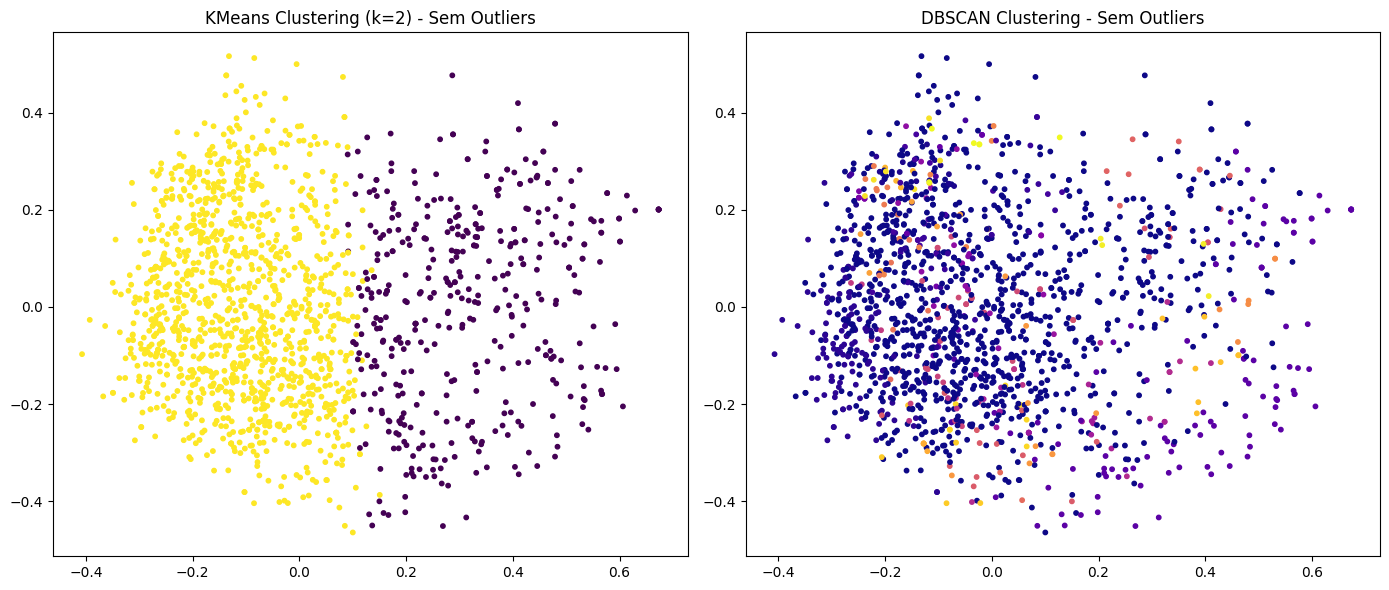

Cluster 1 (429 documentos): program, programaca, cnc, conhec, requisit, desenvolv, tecn, maquin, experienc, ensin
Cluster 2 (1237 documentos): desenvolv, experienc, conhec, sistem, tecnolog, dad, equip, soluco, empr, projet


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Exemplo de pipeline completo
# -----------------------------

# 1) Criação da matriz TF-IDF (ajuste de n-gramas e remoção de termos irrelevantes)
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 3), stop_words='english')
filtered_df['joined_tokens2'] = filtered_df['cleaned_description_without_stopwords'].apply(
    lambda tokens: ' '.join([token for token in tokens if token not in ['cnc', 'innolevels', 'qintess', 'requisitos', 'atribuices', 'atuao', 'exigida', 'mnima', 'rea', 'atribuicoes', 'ensino']])
)
X = vectorizer.fit_transform(filtered_df['joined_tokens'])

# 2) Detecção de Outliers com IsolationForest
isolation_forest = IsolationForest(
    contamination=0.05,  # ~3% dos dados serão considerados outliers (ajuste conforme seu domínio)
    random_state=42
)
outlier_preds = isolation_forest.fit_predict(X)

# Verificar quantos outliers foram detectados
n_outliers = np.sum(outlier_preds == -1)
print(f"Quantidade de outliers detectados: {n_outliers}")

# Criar coluna no DataFrame indicando o rótulo de outlier: -1 = outlier, +1 = inlier
filtered_df['outlier_label'] = outlier_preds

# Filtrar para manter somente os inliers (sem outliers)
filtered_df_no_outliers = filtered_df[filtered_df['outlier_label'] == 1]
X_no_outliers = X[outlier_preds == 1]

print(f"Tamanho do DataFrame original: {len(filtered_df)}")
print(f"Tamanho do DataFrame sem outliers: {len(filtered_df_no_outliers)}")

# 3) Determinação do número ótimo de clusters (KMeans) usando apenas dados sem outliers
silhouette_scores = []
for n_clusters in range(2, 15):  # Faixa de busca de k
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    cluster_labels = kmeans.fit_predict(X_no_outliers)
    silhouette_avg = silhouette_score(X_no_outliers, cluster_labels)
    print(f"Número de Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}")
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2
print("\nNúmero ótimo de clusters (KMeans) =", optimal_n_clusters)

# 4) Aplicação do KMeans com k ótimo
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=50)
filtered_df_no_outliers['kmeans_cluster'] = kmeans.fit_predict(X_no_outliers)

# 5) Aplicação do DBSCAN para comparação (também só nos dados sem outliers)
dbscan = DBSCAN(eps=0.3, min_samples=5, metric='cosine')
filtered_df_no_outliers['dbscan_cluster'] = dbscan.fit_predict(X_no_outliers)

# 6) Redução de dimensionalidade para visualização (PCA em 2D)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_no_outliers.toarray())

# Plotagem lado a lado dos resultados de KMeans e DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_reduced[:, 0], X_reduced[:, 1],
                c=filtered_df_no_outliers['kmeans_cluster'],
                cmap='viridis', s=10)
axes[0].set_title(f'KMeans Clustering (k={optimal_n_clusters}) - Sem Outliers')

axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1],
                c=filtered_df_no_outliers['dbscan_cluster'],
                cmap='plasma', s=10)
axes[1].set_title('DBSCAN Clustering - Sem Outliers')

plt.tight_layout()
plt.show()

# 7) Exibir as palavras mais frequentes por cluster KMeans (nos dados sem outliers)
for cluster_id in range(optimal_n_clusters):
    cluster_docs = filtered_df_no_outliers[filtered_df_no_outliers['kmeans_cluster'] == cluster_id]
    cluster_words = ' '.join(cluster_docs['joined_tokens']).split()
    top_words = pd.Series(cluster_words).value_counts().head(10).index.tolist()
    print(f"Cluster {cluster_id + 1} ({len(cluster_docs)} documentos): {', '.join(top_words)}")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkadr0_j1
  JVM stdout: /tmp/tmpkadr0_j1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkadr0_j1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_unknownUser_aw1kwx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: | (failed)

12:13:25.366: _train param, Dropping bad and constant columns: [text]
12:13:25.370: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
12:13:25.370: _train param, Training data must have at least 2 features (incl. response).
12:13:25.391: _train param, Dropping bad and constant columns: [text]
12:13:25.392: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
12:13:25.392: _train param, Training data must have at least 2 features (incl. response).
12:13:25.409: _train param, Dropping bad and constant columns: [text]
12:13:25.409: _respons

OSError: Job with key $03017f00000132d4ffffffff$_b1843cd8cd462bfd7ca0be548c304742 failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:776)
	at ai.h2o.automl.AutoML.run(AutoML.java:494)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=5c0a317e24e6c3aa08aec3beddf8cc63763bea98f8ab0b9e54d5d5c7c2696b18
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


Clusters encontrados pelo HDBSCAN: 7
Silhouette Score para HDBSCAN: 0.1270
Calinski-Harabasz Score para HDBSCAN: 16.2190
Davies-Bouldin Index para HDBSCAN: 2.0098
Silhouette Score para GMM: 0.0534
Calinski-Harabasz Score para GMM: 90.8263
Davies-Bouldin Index para GMM: 3.0764


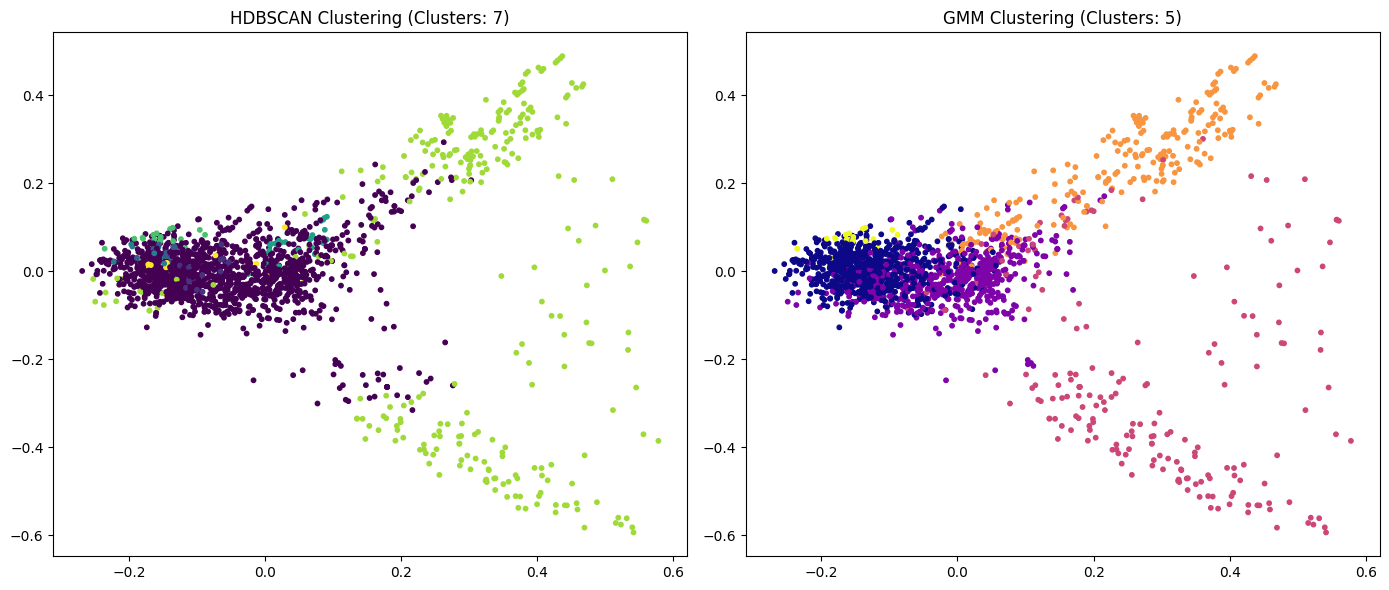

Cluster HDBSCAN 1 (24 documentos): agil, assistenc, pesso, desenvolv, conhec, depend, colabor, mund, val, qintes
Cluster HDBSCAN 2 (13 documentos): desenvolv, pesso, melhor, experienc, empr, experian, seras, test, tod, oportun
Cluster HDBSCAN 3 (15 documentos): desenvolv, brad, pesso, dia, financ, serv, produt, experienc, val, sistem
Cluster HDBSCAN 4 (30 documentos): desenvolv, experienc, grand, empr, equip, conhec, atu, projet, tecnolog, plataform
Cluster HDBSCAN 5 (21 documentos): experienc, apoi, pesso, campin, desenvolv, plataform, tim, atu, engenh, tecnolog
Cluster HDBSCAN 6 (301 documentos): desenvolv, program, cnc, experienc, conhec, requisit, maquin, tecnolog, usin, empr
Cluster HDBSCAN 7 (19 documentos): desenvolv, equip, jog, experienc, inov, tecnolog, trabalh, glob, talent, conhec
Cluster GMM 1 (749 documentos): desenvolv, experienc, conhec, tecnolog, soluco, dad, pesso, equip, empr, sistem
Cluster GMM 2 (568 documentos): desenvolv, conhec, experienc, sistem, equip, dad, so

<1754x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 202039 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# 1) Transformação dos tokens em matriz TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(filtered_df['joined_tokens'])  # Substitua pelo DataFrame correto

# 2) Cálculo da matriz de distâncias com a métrica de cosseno
X_cosine = cosine_distances(X)

# 3) Aplicação do HDBSCAN com matriz de distâncias de cosseno
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, metric='precomputed')
hdbscan_labels = clusterer_hdbscan.fit_predict(X_cosine)

# Verificar quantos clusters foram encontrados pelo HDBSCAN
n_clusters_hdbscan = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
print(f"Clusters encontrados pelo HDBSCAN: {n_clusters_hdbscan}")

# Calcular Silhouette Score para HDBSCAN (ignorar outliers: -1)
if n_clusters_hdbscan > 1:
    silhouette_hdbscan = silhouette_score(X[hdbscan_labels != -1].toarray(), hdbscan_labels[hdbscan_labels != -1])
    print(f"Silhouette Score para HDBSCAN: {silhouette_hdbscan:.4f}")
else:
    print("HDBSCAN encontrou menos de 2 clusters; Silhouette Score não calculado.")

# Métricas adicionais para HDBSCAN
if n_clusters_hdbscan > 1:
    calinski_hdbscan = calinski_harabasz_score(X[hdbscan_labels != -1].toarray(), hdbscan_labels[hdbscan_labels != -1])
    davies_bouldin_hdbscan = davies_bouldin_score(X[hdbscan_labels != -1].toarray(), hdbscan_labels[hdbscan_labels != -1])
    print(f"Calinski-Harabasz Score para HDBSCAN: {calinski_hdbscan:.4f}")
    print(f"Davies-Bouldin Index para HDBSCAN: {davies_bouldin_hdbscan:.4f}")

# 4) Aplicação do Gaussian Mixture Models (GMM)
n_components = 5  # Ajustar dinamicamente conforme os dados
pca = PCA(n_components=50, random_state=42)  # Redução opcional de dimensionalidade
X_reduced = pca.fit_transform(X.toarray())

gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_reduced)

# Calcular Silhouette Score para GMM
silhouette_gmm = silhouette_score(X_reduced, gmm_labels)
print(f"Silhouette Score para GMM: {silhouette_gmm:.4f}")

# Métricas adicionais para GMM
calinski_gmm = calinski_harabasz_score(X_reduced, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(X_reduced, gmm_labels)
print(f"Calinski-Harabasz Score para GMM: {calinski_gmm:.4f}")
print(f"Davies-Bouldin Index para GMM: {davies_bouldin_gmm:.4f}")

# 5) Visualizar os resultados dos clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# HDBSCAN
axes[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=hdbscan_labels, cmap='viridis', s=10)
axes[0].set_title(f"HDBSCAN Clustering (Clusters: {n_clusters_hdbscan})")

# GMM
axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='plasma', s=10)
axes[1].set_title(f"GMM Clustering (Clusters: {n_components})")

plt.tight_layout()
plt.show()

# 6) Exibir as palavras mais frequentes em cada cluster (HDBSCAN)
for cluster_id in range(n_clusters_hdbscan):
    if cluster_id == -1:
        continue  # Ignorar outliers
    cluster_docs = filtered_df[hdbscan_labels == cluster_id]
    cluster_words = ' '.join(cluster_docs['joined_tokens']).split()
    top_words = pd.Series(cluster_words).value_counts().head(10).index.tolist()
    print(f"Cluster HDBSCAN {cluster_id + 1} ({len(cluster_docs)} documentos): {', '.join(top_words)}")

# Exibir as palavras mais frequentes em cada cluster (GMM)
for cluster_id in range(n_components):
    cluster_docs = filtered_df[gmm_labels == cluster_id]
    cluster_words = ' '.join(cluster_docs['joined_tokens']).split()
    top_words = pd.Series(cluster_words).value_counts().head(10).index.tolist()
    print(f"Cluster GMM {cluster_id + 1} ({len(cluster_docs)} documentos): {', '.join(top_words)}")
X

In [ ]:
# prompt: gere um csv da coluna joined tokens

filtered_df.to_csv('joined_tokens_data.csv', index=False)
from google.colab import files
files.download('joined_tokens_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filtered_df

,company_name,is_remote,origin_site_name,created_at,external_job_url,postedTime,published_date,company_id,title,search_term,...,work_type,job_id,experienceLevel,tokenized_description,cleaned_description,cleaned_description_without_stopwords,stemmed_tokens,joined_tokens,joined_tokens2,outlier_label
6,ília,NaN,linkedin,NaN,https://boards.greenhouse.io/ilia/jobs/5399604004,1 week ago,2024-12-13,73466489.0,PL/SR Desenvolvimento Back-end (Node.js e Type...,software,...,Other,d2d6f3c6-a1ac-4864-a9b1-888fa4a3eb4c,Not Applicable,"[Aqui, na, ília, nossas, vagas, estão, sempre,...","[aqui, na, ilia, nossas, vagas, estao, sempre,...","[ilia, vagas, estao, sempre, abertas, todas, p...","[ili, vag, esta, sempr, abert, tod, pesso, nao...",ili vag esta sempr abert tod pesso nao restrin...,ilia vagas estao sempre abertas todas pessoas ...,1
7,IAV do Brasil,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-de-...,1 week ago,2024-12-13,11530771.0,Analista de desenvolvimento de produtos,desenvolvedor,...,Engineering,d18ecf0f-27b7-4bbe-a842-149f7b7160aa,Associate,"[Calibração, Tarefas, e, Responsabilidades, :,...","[calibracao, tarefas, e, responsabilidades, es...","[calibracao, tarefas, responsabilidades, estra...","[calibraca, taref, respons, estrateg, calibrac...",calibraca taref respons estrateg calibraca def...,calibracao tarefas responsabilidades estrategi...,1
8,Kantar IBOPE Media,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-de-...,4 days ago,2024-12-13,14524.0,Analista de Desenvolvimento Jr.,programador,...,Information Technology,067ad76e-afdd-4d99-a85b-6dc4198dd68c,Associate,"[Já, pensou, em, trabalhar, em, uma, empresa, ...","[ja, pensou, em, trabalhar, em, uma, empresa, ...","[ja, pensou, trabalhar, empresa, lider, global...","[ja, pens, trabalh, empr, lid, glob, dad, insi...",ja pens trabalh empr lid glob dad insight cons...,ja pensou trabalhar empresa lider global dados...,-1
9,Webcartórios,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/analista-pro...,1 week ago,2024-12-13,82648809.0,Analista Programador Pleno III,programador,...,Software Development,5e727f3f-e5b4-4bdd-8178-a085f7ee318c,Not Applicable,"[O, que, você, fará, :, *, Manutenção, e, dese...","[o, que, voce, fara, manutencao, e, desenvolvi...","[fara, manutencao, desenvolvimento, backend, f...","[far, manutenca, desenvolv, backend, frontend,...",far manutenca desenvolv backend frontend respo...,fara manutencao desenvolvimento backend fronte...,1
11,FOURSYS,NaN,linkedin,NaN,https://br.linkedin.com/jobs/view/desenvolvedo...,1 week ago,2024-12-13,1277442.0,Desenvolvedor(a) Front End React,desenvolvedor,...,Information Technology,2cebb8ef-081e-49da-a4f7-512824dba221,Mid-Senior level,"[A, Foursys, é, um, time, apaixonado, por, ino...","[a, foursys, e, um, time, apaixonado, por, ino...","[foursys, time, apaixonado, inovacao, design, ...","[foursy, tim, apaixon, inovaca, design, transf...",foursy tim apaixon inovaca design transformaca...,foursys time apaixonado inovacao design transf...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Banco Bradesco SA,NaN,indeed,2024-12-18T04:10:12.333Z,https://br.indeed.com/applystart?jk=822569a14e...,NaN,2024-12-16T23:44:28.000Z,NaN,Pessoas Desenvolvedora Backend SR,desenvolvedor,...,NaN,4908a3b1-4349-4826-8d39-f42edbebffc9,NaN,"[Sobre, o, Bradesco, O, Bradesco, é, um, dos, ...","[sobre, o, bradesco, o, bradesco, e, um, dos, ...","[sobre, bradesco, bradesco, maiores, grupos, f...","[sobr, brad, brad, mai, grup, financ, brasil, ...",sobr brad brad mai grup financ brasil hist mar...,sobre bradesco bradesco maiores grupos finance...,-1
2847,Sankhya Gestão de Negócios,NaN,indeed,2024-12-18T04:47:07.234Z,https://br.indeed.com/applystart?jk=b15dd59ae7...,NaN,2024-12-17T06:44:36.000Z,NaN,Arquiteto(a) de Software Especialista,programador,...,NaN,4dbf1d32-cee1-4679-905f-181765b74729,NaN,"[Estamos, com, oportunidades, para, Arquiteto,...","[estamos, com, oportunidades, para, arq

In [ ]:
filtered_df['cleaned_description_without_stopwords']

# hARD SKILS



In [ ]:
ilter_terms = [
    'sbi', 'soap', 'sap', 'plsql', 'ddd', 'linux', 'review', 'android', 'vuej', 'js',
    'github', 'microsoft', 'dad', 'test', 'serv', 'process', 'banc', 'jav', 'design',
    'sql', 'backend', 'framework', 'git', 'react', 'javascript', 'frontend',
    'performanc', 'computaca', 'cs', 'agil', 'seguranc', 'net', 'html', 'ti', 'cnc',
    'unitari', 'python', 'angul', 'aw', 'cloud', 'php', 'api', 'cienc', 'alem', 'ingl',
    'nodej', 'rest', 'spring', 'scrum', 'offic', 'dock', 'mysql', 'azur', 'devop',
    'version', 'segu', 'typescript', 'kanban', 'postgresql', 'excel', 'restful', 'hor',
    'autom', 'microserv', 'instituico', 'intermediari', 'elabor', 'demand', 'ajust',
    'cidad', 'corpor', 'ecossistem', 'clean', 'kubernet', 'nuv', 'nosql', 'mongodb',
    'nativ', 'mvc', 'microsserv', 'laravel', 'script'
]


# Criar uma nova coluna com os tokens filtrados
filtered_df['filtered_tokens'] = filtered_df['joined_tokens'].apply(
    lambda x: ' '.join([word for word in x.split() if word in filter_terms])
)
filtered_df['filtered_tokens']

,filtered_tokens
6,dad design backend nodej react typescript rest...
7,dad process dad test dad test dad test test da...
8,dad design process process elabor cienc comput...
9,backend frontend html javascript cs script php...
11,design dad dad test unitari react aw typescrip...
...,...
2846,serv ecossistem ti performanc backend elabor p...
2847,segu seguranc dad review banc dad sql banc dad...
2854,cienc serv cienc seguranc segu process corpor ...
2868,alem net angul sql serv azur azur devop hor ne...


## unigramas

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # Bigramas
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['filtered_tokens'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Inicializa o CountVectorizer para contar as ocorrências dos n-gramas
count_vectorizer = CountVectorizer(ngram_range=(1, 1))
count_matrix = count_vectorizer.fit_transform(filtered_df['filtered_tokens'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Importância pelo TF-IDF
ngrams_importance = tfidf_df.sum(axis=0)

# Total de ocorrências de cada n-grama
ngrams_counts = count_df.sum(axis=0)

# Número de documentos distintos em que cada n-grama aparece
ngrams_docs = (count_df > 0).sum(axis=0)

# Combina todas as informações em um DataFrame
combined_df = pd.DataFrame({
    'Importância (TF-IDF)': ngrams_importance,
    'Total de Ocorrências': ngrams_counts,
    'Total de Documentos': ngrams_docs
}).sort_values(by='Importância (TF-IDF)', ascending=False)

# Exibe os 50 n-gramas mais importantes
print("Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):")
combined_df.head(20)


Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):


,Importância (TF-IDF),Total de Ocorrências,Total de Documentos
dad,198.330754,1716,804
serv,168.417904,1206,657
process,163.311428,1069,605
test,162.305713,1206,686
banc,132.137466,987,679
jav,111.540056,625,361
ti,105.875043,363,310
cnc,101.836908,329,117
backend,94.923139,552,354
sql,94.425415,564,458


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Bigramas
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['filtered_tokens'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Inicializa o CountVectorizer para contar as ocorrências dos n-gramas
count_vectorizer = CountVectorizer(ngram_range=(2, 2))
count_matrix = count_vectorizer.fit_transform(filtered_df['filtered_tokens'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Importância pelo TF-IDF
ngrams_importance = tfidf_df.sum(axis=0)

# Total de ocorrências de cada n-grama
ngrams_counts = count_df.sum(axis=0)

# Número de documentos distintos em que cada n-grama aparece
ngrams_docs = (count_df > 0).sum(axis=0)

# Combina todas as informações em um DataFrame
combined_df = pd.DataFrame({
    'Importância (TF-IDF)': ngrams_importance,
    'Total de Ocorrências': ngrams_counts,
    'Total de Documentos': ngrams_docs
}).sort_values(by='Importância (TF-IDF)', ascending=False)

# Exibe os 50 n-gramas mais importantes
print("Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):")
combined_df.head(20)


Resumo de N-gramas (TF-IDF, Ocorrências e Documentos):


,Importância (TF-IDF),Total de Ocorrências,Total de Documentos
banc dad,78.827352,860,615
cnc cnc,43.257335,128,66
cienc computaca,35.229993,254,243
test unitari,34.805201,317,263
html cs,33.833719,272,246
sql serv,32.200186,221,180
dad sql,31.359478,231,216
dad dad,28.056950,194,85
process process,27.106274,151,108
cs javascript,23.715525,163,147


# Outras analises

## Salário

### Cálculo pelo campo

In [ ]:
import re

def parse_salary(salary):
    """
    Extracts the average salary from a salary string.

    Args:
        salary_string: The salary string to process.

    Returns:
        The average salary as a float, or None if the salary cannot be extracted.
    """
    # Handle cases with "/mo" or "por mês"
    salary_string = str(salary)
    if "mo" in salary_string:
        # Use regular expression to find numbers with or without commas
      parts = salary_string.split("-")
      if len(parts) == 2:
            try:
              min_salary = float(parts[0].replace("R$", "").replace(',', '').replace("/mo", "").strip())
              max_salary = float(parts[1].replace("R$", "").replace(',', '').replace("/mo", "").strip())
              avg_salary = (min_salary + max_salary) / 2
              return avg_salary
            except (ValueError, IndexError):
                return None
      else:
            matches = re.findall(r"R\$[\s]?([\d.,]+)", salary_string)
            if matches:
                try:
                    salary = float(matches[0].replace(',', ''))
                    return salary
                except (ValueError, IndexError):
                    return None
            else:
                return None
    elif "por mês" in salary_string:
        # Split the string into ranges and extract numerical values
        parts = salary_string.split("–")
        if len(parts) == 2:
            try:
              min_salary = float(parts[0].replace("R$ ", "").replace('.', '').replace(',', '.'))
              max_salary = float(parts[1].replace("R$ ", "").replace('.', '').replace(',', '.').replace("por mês", "").strip())
              avg_salary = (min_salary + max_salary) / 2
              return avg_salary
            except (ValueError, IndexError):
                return None
        else:
            # Match a single salary value
            match = re.search(r"R\$[\s]?([\d.]+)", salary_string)
            if match:
              try:
                salary = float(match.group(1).replace('.', '').replace(',', '.'))
                return salary
              except (ValueError, IndexError):
                  return None
            else:
                return None
    else:
        return None


In [ ]:
df_salary = filtered_df.copy()
df_salary['clean_salary'] = df_salary['salary'].apply(parse_salary)
df_salary.dropna(subset=['clean_salary'])[['salary','clean_salary']].head(50)


In [ ]:
# filtered_df_salary = df_salary.dropna(subset=['clean_salary'])

# salary_stats = filtered_df_salary['clean_salary'].describe()
# print("Salary Statistics:\n", salary_stats)

# plt.figure(figsize=(10, 6))
# plt.hist(filtered_df_salary['clean_salary'], bins=20, edgecolor='black')  # Adjust bins as needed
# plt.xlabel('Salary')
# plt.ylabel('Frequency')
# plt.title('Salary Distribution')
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.boxplot(filtered_df_salary['clean_salary'])
# plt.ylabel('Salary')
# plt.title('Salary Boxplot')
# plt.show()

# # Identify potential outliers (using IQR method as an example)
# Q1 = filtered_df_salary['clean_salary'].quantile(0.25)
# Q3 = filtered_df_salary['clean_salary'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = filtered_df_salary[(filtered_df_salary['clean_salary'] < lower_bound) | (filtered_df_salary['clean_salary'] > upper_bound)]
# print("\nPotential Outliers:\n", outliers['clean_salary'])


In [ ]:
df_salary.dropna(subset=['clean_salary'])

### Cálculo pelos campos descritivos

In [ ]:
import pandas as pd

def get_description_lines(df):
    # Extrai a linha anterior e até duas linhas após a palavra "salário"

    def extract_lines(description):
        try:
            description_str = str(description)
            salary_index = description_str.lower().find("salário")
            if salary_index == -1:
                salary_index = description_str.lower().find("salario")

            if salary_index != -1:
                lines = description_str.split('\n')
                # Identifica a linha onde "salário" aparece
                for i, line in enumerate(lines):
                    if "salário" in line.lower() or "salario" in line.lower():
                        start_idx = max(i - 1, 0)  # Uma linha antes
                        end_idx = min(i + 2, len(lines))  # Até duas linhas depois
                        return '\n'.join(lines[start_idx:end_idx])
                return None
            else:
                return None
        except Exception as e:
            return f"Erro ao processar descrição: {e}"

    df['description_lines'] = df['description'].apply(extract_lines)
    return df

# Exemplo de uso
df_salary = get_description_lines(df_salary)

df_salary['description_lines'].dropna()


In [ ]:
print(df_salary[['description_lines', 'description']])

#### Extraindo valores


In [ ]:
# # prompt: crie um csv de filtered_df_filtered
# from google.colab import files
# filtered_df.to_csv('filtered_df.csv', index=False)
# files.download('filtered_df.csv')

In [ ]:
import re
import pandas as pd

def extract_salary_values(description_lines):
    """
    Extracts salary values (numerical amounts) from description lines.

    Args:
        description_lines (pd.Series): A pandas Series containing job description lines.

    Returns:
        pd.Series: A pandas Series containing lists of extracted salary values
                   (floats or integers) for each description line.
    """

    def extract_from_line(line):
        # Regular expression to find numerical amounts with "R$" or "$"
        matches = re.findall(r"(?:R\$|\$)\s*([\d{1,3}(?:\.\d{3})*(?:,\d+)?]+)", line)
        values = []
        for match in matches:
            try:
                # Remove '.' for thousands and replace ',' with '.' for decimal
                value = match.replace('.', '').replace(',', '.')
                values.append(float(value))  # Convert to float
            except ValueError:
                pass  # Ignore invalid number formats
        return values

    # Apply extraction function to each line in the description
    return description_lines.astype(str).apply(lambda x: [val for line in x.split('\n') for val in extract_from_line(line)])

# Apply the function to your 'description_lines' column
df_salary['extracted_salary_values'] = extract_salary_values(df_salary['description_lines'])

# Display rows with extracted salary values
print(df_salary[df_salary['extracted_salary_values'].apply(lambda x: len(x) > 0)][['description_lines', 'extracted_salary_values']])


In [ ]:

import pandas as pd


def get_max_salary(salary_list):
  """
  Returns the maximum salary from a list, or None if the list is empty or all values are less than 1000.
  """
  if not salary_list:
    return None

  max_salary = 0
  for salary in salary_list:
    if salary >= 1000:
        max_salary = max(max_salary, salary)

  if max_salary == 0:
      return None
  else:
    return max_salary


df_salary['max_extracted_salary'] = df_salary['extracted_salary_values'].apply(get_max_salary)

In [ ]:
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:.2f}'.format # This will change the display format for floats in the entire notebook.
print(df_salary[df_salary['max_extracted_salary'].notnull()][['title','max_extracted_salary', 'description_lines']])
pd.reset_option('display.max_colwidth')


In [ ]:
print(len(df_salary[df_salary['max_extracted_salary'].notna()]))

In [ ]:
df_salary['max_extracted_salary'].describe()
#

In [ ]:
df_salary_sorted = df_salary.sort_values(by='max_extracted_salary', ascending=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_salary_sorted[['title', 'max_extracted_salary', 'description_lines']])

In [ ]:

df_salary['salary_final'] = df_salary['clean_salary']

df_salary['salary_final'] = df_salary['salary_final'].fillna(df_salary['max_extracted_salary'])

In [ ]:
df_salary_filtered = df_salary[df_salary['salary_final'].notnull()]

df_salary_filtered['salary_final']

In [ ]:
df_salary['salary_final'].describe()


In [ ]:

df_filtered = df_salary[df_salary['description_lines'].notnull() | df_salary['salary_final'].notnull()]

df_filtered

#### GRÁFICOS


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

main_color = "#592a9e"
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_salary,
    x='salary_final',
    kde=True,
    bins=30,
    color=main_color
)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    y=df_salary['salary_final'],
    color=main_color
)
plt.title('Boxplot de Salários')
plt.ylabel('Salário')
plt.show()

### Tokenização

In [ ]:
df_salary = tokenize_content(df_salary, 'description_lines')

In [ ]:
df_salary['cleaned_description_lines'] = df_salary['tokenized_description_lines'].apply(clean_tokens)

df_salary['cleaned_description_lines']

In [ ]:
df_salary = df_salary.dropna(subset=['cleaned_description_lines'])
df_salary

### StopWords

In [ ]:
custom_stopwords = ['']
df_salary['cleaned_description_lines_without_stopwords'] = df_salary['cleaned_description_lines'].apply(
    lambda tokens: remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=custom_stopwords)
)

df_salary['cleaned_description_lines_without_stopwords']


### Stemmização

In [ ]:
df_salary['stemmed_tokens'] = df_salary['cleaned_description_lines_without_stopwords'].apply(
    lambda tokens: apply_stemming(tokens, language='portuguese')
)

df_salary['stemmed_tokens']

### Unigrama

In [ ]:
df_salary['joined_tokens'] = df_salary['stemmed_tokens'].apply(lambda x: ' '.join(x))


In [ ]:

import pandas as pd

def remove_salari_lines(df):
    """Removes rows where the only stemmed token is 'salari'."""
    df = df[~df['stemmed_tokens'].apply(lambda tokens: len(tokens) == 1 and tokens[0] == 'salari' or len(tokens) == 0)]
    return df

df_salary = remove_salari_lines(df_salary)

In [ ]:
df_salary2

In [ ]:
df_salary

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df_salary['joined_tokens'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(12))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_salary['joined_tokens'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

word_frequencies = tfidf_df.sum(axis=0)

word_importance = pd.DataFrame({
    'term': word_frequencies.index,
    'tfidf_sum': word_frequencies.values,
    'document_count': tfidf_df[word_frequencies.index].astype(bool).sum(axis=0)
})

word_importance = word_importance.sort_values(by='tfidf_sum', ascending=False)


print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(12))

# Localização

In [ ]:
filtered_df.columns

In [ ]:
# Função para aplicar as condições
def classify_location(row):
    if row['is_remote'] == 'remote':
        # Se for remoto, retorna 'remoto'
        return 'remoto'
    elif row['location'] in ['Remoto', 'Brazil']:
        # Se a localização for 'Remoto' ou 'Brazil', retorna 'remoto'
        return 'remoto'
    else:
        # Caso contrário, retorna o valor original de location
        return row['location']

# Aplicando a função
filtered_df['classified_location'] = filtered_df.apply(classify_location, axis=1)

# Verificando o resultado
print(filtered_df[['is_remote', 'location', 'classified_location']])


In [ ]:
# prompt: conte os valores emque classified_location   é igual a remoto

remote_count = len(filtered_df[filtered_df['classified_location'] == 'remoto'])
print(f"Number of remote jobs: {remote_count}")

In [ ]:
import pandas as pd
import re

# Definição dos estados com palavras-chave
states = {
    "Acre": ["acre"],
    "Alagoas": ["alagoas"],
    "Amapá": ["amapá"],
    "Amazonas": ["amazonas"],
    "Bahia": ["bahia"],
    "Ceará": ["ceará"],
    "Espírito Santo": ["espírito santo"],
    "Goiás": ["goiás"],
    "Maranhão": ["maranhão"],
    "Mato Grosso": ["mato grosso"],
    "Mato Grosso do Sul": ["mato grosso do sul"],
    "Minas Gerais": ["minas gerais"],
    "Pará": ["pará"],
    "Paraíba": ["paraíba"],
    "Paraná": ["paraná"],
    "Pernambuco": ["pernambuco"],
    "Piauí": ["piauí"],
    "Rio de Janeiro": ["rio de janeiro"],
    "Rio Grande do Norte": ["rio grande do norte"],
    "Rio Grande do Sul": ["rio grande do sul"],
    "Rondônia": ["rondônia"],
    "Roraima": ["roraima"],
    "Santa Catarina": ["santa catarina"],
    "São Paulo": ["são paulo"],
    "Sergipe": ["sergipe"],
    "Tocantins": ["tocantins"],
    "Distrito Federal": ["distrito federal"],
    "Remoto": ["remoto"]
}

location_to_state = {
    'Federal District, Brazil': 'Distrito Federal',
    'Greater Porto Alegre': 'Rio Grande do Sul',
    'Greater Campinas': 'São Paulo',
    'Greater Belo Horizonte': 'Minas Gerais',
    'Brasília, Federal District, Brazil': 'Distrito Federal',
    'Greater Goiania': 'Goiás',
    'Greater Ribeirão Preto': 'São Paulo',
    'Greater Florianopolis': 'Santa Catarina',
    'Greater Curitiba': 'Paraná',
    'Vitoria, Brazil Metropolitan Area': 'Espírito Santo',
    'Greater Natal': 'Rio Grande do Norte',
    'Greater Londrina': 'Paraná'
}

state_abbreviations = {
    "Acre": "ac",
    "Alagoas": "al",
    "Amapá": "ap",
    "Amazonas": "am",
    "Bahia": "ba",
    "Ceará": "ce",
    "Espírito Santo": "es",
    "Goiás": "go",
    "Maranhão": "ma",
    "Mato Grosso": "mt",
    "Mato Grosso do Sul": "ms",
    "Minas Gerais": "mg",
    "Pará": "pa",
    "Paraíba": "pb",
    "Paraná": "pr",
    "Pernambuco": "pe",
    "Piauí": "pi",
    "Rio de Janeiro": "rj",
    "Rio Grande do Norte": "rn",
    "Rio Grande do Sul": "rs",
    "Rondônia": "ro",
    "Roraima": "rr",
    "Santa Catarina": "sc",
    "São Paulo": "sp",
    "Sergipe": "se",
    "Tocantins": "to",
    "Distrito Federal": "df"
}

for state, abbr in state_abbreviations.items():
    # Usar regex de palavra inteira para siglas
    states[state].append(rf'\b{abbr}\b')

# Função para encontrar o estado
def find_state(location):
    location = str(location).lower()

    # Verifica se o local é mapeado no dicionário location_to_state
    if location in location_to_state:
        return location_to_state[location]

    # Caso contrário, verifica com o dicionário states
    for state, keywords in states.items():
        for keyword in keywords:
            # Compilar regex para correspondência de palavra inteira
            pattern = re.compile(keyword, re.IGNORECASE)
            if pattern.search(location):
                return state
    return None

# Aplicar a função ao DataFrame
filtered_df['state'] = filtered_df['classified_location'].apply(find_state)

# Contar as ocorrências por estado
state_counts = filtered_df['state'].value_counts()
print(state_counts)



In [ ]:
state_counts

In [ ]:
total_general = state_counts.sum()
print(total_general)

In [ ]:
unclassified = filtered_df[filtered_df['state'].isna()]

subset_unclassified = unclassified[['classified_location', 'state']].head(50)

unique_classified_location = subset_unclassified['classified_location'].unique()

print("Valores únicos em 'classified_location':")
print(unique_classified_location)


## Gráfico

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np

state_counts = filtered_df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

state_abbr = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
    'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA',
    'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'São Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

# Separar os dados de "Remoto"
remote_count = state_counts[state_counts['state'] == 'Remoto']['count'].values[0]
state_counts = state_counts[state_counts['state'] != 'Remoto']

# Carregar o shapefile dos estados brasileiros (GeoJSON)
states_shapefile = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Juntar os dados com o shapefile
merged = states_shapefile.merge(state_counts, how='left', left_on='name', right_on='state')
merged['count'] = merged['count'].fillna(0)

# Aplicar escala logarítmica para maior contraste
merged['log_count'] = merged['count'].apply(lambda x: np.log1p(x))

# Definir o colormap customizado até o tom roxo #592a9e
cmap = mcolors.LinearSegmentedColormap.from_list("custom_ramp", ["#ffffff", "#592a9e"])

# Plotar o mapa
fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='log_count', cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

# Adicionar as siglas dos estados junto com o número de vagas
for idx, row in merged.iterrows():
    plt.text(
        row['geometry'].centroid.x,
        row['geometry'].centroid.y,
        f"{state_abbr.get(row['name'], '')}\n({int(row['count'])})",
        horizontalalignment='center', fontsize=8, color='black', weight='bold'
    )

# Adicionar representação para "Remoto"
remote_patch = mpatches.Patch(color='#592a9e', label=f'Remoto: {remote_count} anúncios')
plt.legend(handles=[remote_patch], loc='lower left')

# Adicionar título
plt.title('Distribuição de Anúncios por Estado no Brasil', fontsize=15)
plt.axis('off')

plt.show()


# Analise dos titullos

## Tokenização

In [ ]:
filtered_df = tokenize_content(filtered_df, 'title')

# Exibe o resultado
filtered_df[['title', 'tokenized_title']].head()

## Limpeza

In [ ]:
filtered_df['cleaned_title'] = filtered_df['tokenized_title'].apply(clean_tokens)

filtered_df['cleaned_title']

## StopWords


In [ ]:
custom_stopwords = []
filtered_df['cleaned_title_without_stopwords'] = filtered_df['cleaned_title'].apply(
    lambda tokens: remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=custom_stopwords)
)

filtered_df['cleaned_title_without_stopwords']

## Stemming

In [ ]:
filtered_df['stemmed_title_tokens'] = filtered_df['cleaned_title_without_stopwords'].apply(
    lambda tokens: apply_stemming(tokens, language='portuguese')
)

filtered_df['stemmed_title_tokens']

## Unigrama

In [ ]:
filtered_df['joined_title_tokens'] = filtered_df['stemmed_title_tokens'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_title_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(20))

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_title_tokens'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

word_frequencies = tfidf_df.sum(axis=0)

word_importance = pd.DataFrame({
    'term': word_frequencies.index,
    'tfidf_sum': word_frequencies.values,
    'document_count': tfidf_df[word_frequencies.index].astype(bool).sum(axis=0)
})

word_importance = word_importance.sort_values(by='tfidf_sum', ascending=False)


print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(50))

In [ ]:

tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2)) # Use ngram_range to specify 2-grams
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_title_tokens'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

word_frequencies = tfidf_df.sum(axis=0)

word_importance = pd.DataFrame({
    'term': word_frequencies.index,
    'tfidf_sum': word_frequencies.values,
    'document_count': tfidf_df[word_frequencies.index].astype(bool).sum(axis=0)
})

# Sort by TF-IDF sum
word_importance = word_importance.sort_values(by='tfidf_sum', ascending=False)

print("\n2-grams mais importantes no corpus (TF-IDF):")
print(word_importance.head(50))

# Outros


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


dados = {
    'Categoria':   ['Estagiário', 'Júnior', 'Pleno', 'Sênior'],
    'TF-IDF':      [18.99,        80.02,     100.59,   100.45],
    'Documentos':  [37,           152,       222,      229]
}
df = pd.DataFrame(dados)


sns.set_style("whitegrid")
main_color = "#592a9e"


fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

# --- Lado Esquerdo: TF-IDF ---
axes[0].barh(df['Categoria'],
             df['TF-IDF'],
             color=main_color,
             alpha=0.8)
axes[0].set_title('TF-IDF', fontsize=12)
# Inverte o eixo X para “empurrar” as barras para a esquerda
axes[0].invert_xaxis()

# --- Lado Direito: Número de Documentos ---
axes[1].barh(df['Categoria'],
             df['Documentos'],
             color=main_color,
             alpha=0.3)
axes[1].set_title('Número de Documentos', fontsize=12)

# Se quiser inverter a ordem vertical para ter “Sênior” no topo:
axes[0].invert_yaxis()

# Título geral
plt.suptitle('Pirâmide: TF-IDF vs. Número de Documentos', y=1.03, fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) Exemplo de dicionário de termos com TF-IDF (coloque os seus dados reais aqui)
tfidf_scores = {
    'desenvolv': 133.33,
    'experienc': 94.53,
    'conhec': 84.15,
    'sistem': 68.45,
    'tecnolog': 60.70,
    'emp': 51.67,
    'requisit': 51.23,
    'team': 49.90,
    'projet': 47.40,
    'soluc': 45.27,
    'test': 43.17,
    'linguagem': 40.65,
    'software': 39.89,
    'trabalh': 38.12,
    'are': 38.11,
    'banc':31.71
}

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=None,  # Se quiser usar algo como 'PuRd', troque para colormap='PuRd'
)

wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Ocultar eixos
plt.title("Nuvem de Palavras dimensionada por TF-IDF")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
main_color = "#592a9e"

clusters = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
document_counts = [168, 32, 393, 144, 616, 403]

plt.figure(figsize=(10, 6))
plt.bar(clusters, document_counts, color=main_color)

plt.title("Distribuição de Documentos por Cluster", fontsize=16)
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Número de Documentos", fontsize=12)

plt.tight_layout()
plt.show()
